In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from copy import deepcopy as cdc

from datetime import datetime as dt
import re
def extract_timestamps(series:pd.Series) -> pd.Series:
    timestamp = series.str.extract('_(\d{4}-[\-\d_T]*)DLC', expand=False)
    return pd.to_datetime(timestamp, format="%Y-%m-%dT%H_%M_%S")
##need to have filename column as type str in order for datetime extraction to be used, won't run on Posix type

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

h5='/Users/mollyshallow/Desktop/20221028_allmice_alltrials_LD.h5'
h5_old='/Users/mollyshallow/Desktop/20221011_allmice_alltrials_LD_01.h5'

In [2]:
df_all=pd.read_hdf(h5, key='df')
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_all['folder_path'].astype('str')))
df_all['filename']=df_all['filename'].astype('str')
type(df_all['filename'][0])
df_all=df_all[df_all['filename'].str.contains('0896|0897|0898|0893|0895')]
df_all['capduration']=df_all['captureT']-df_all['timetointercept']
df_all

,filename,folder_path,condition,laser_value,circle,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,captureframe,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,capduration
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-05-07_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.4692367137209918, 2.779779701312001, 3.2017...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19.145,2312.0,6141.0,0.206986,4.360,0.875000,0.142857,5.350,1070.0,13.795
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-07-02_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.757072790716952, 9.362620173911946, 9.82083...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7.435,2005.0,3492.0,0.126763,0.315,0.750000,0.333333,1.970,394.0,5.465
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-12-42_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0548578586351982, 1.1435315586646064, 1.217...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.665,2246.0,2579.0,0.039494,0.265,1.000000,1.000000,1.640,328.0,0.025
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-14-33_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.447304574249497, 8.829336439003862, 10.5655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.040,1781.0,3389.0,0.112360,2.830,0.500000,1.000000,3.460,692.0,4.580
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-16-01_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.550975346948177, 5.2380705840289234, 5.6036...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.510,1125.0,2427.0,0.095671,4.755,1.000000,0.500000,5.670,1134.0,0.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-36-44_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.522058132266212, 10.856752087956144, 12.906...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",28.030,1688.0,7294.0,0.304507,2.015,0.666667,0.100000,3.575,715.0,24.455
1725,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-38-50_mouse-0895,NaN,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.264606355391132, 14.304610560575007, 17.92...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10.995,935.0,3134.0,0.246957,1.615,0.666667,0.250000,2.330,466.0,8.665
1726,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-40-26_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.835,1731.0,7898.0,0.186585,0.580,0.222222,0.500000,14.760,2952.0,16.075
1729,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-56-17_mouse-0893,2.0,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.1924219234042677, 2.9813598229081495, 3.178...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",36.095,869.0,8088.0,0.286885,0.190,0.214286,0.333333,29.560,5912.0,6.535


In [3]:
df_all_old=pd.read_hdf(h5_old, key='df')
with open('folderlist.txt', 'w') as f_out:
    f_out.write('\n'.join(df_all_old['folder_path'].astype('str')))
df_all_old['filename']=df_all_old['filename'].astype('str')

df_all_old=df_all_old[df_all_old['filename'].str.contains('0896|0897|0898|0893|0895')]
# df_cohort1=df_all[df_all['filename'].str.contains('0896|0897|0898')]
# df_cohort2=df_all[df_all['filename'].str.contains('0893|0895')]

df_all_old['capduration']=df_all_old['captureT']-df_all_old['timetointercept']
# df_cohort1['capduration']=df_cohort1['captureT']-df_cohort1['timetointercept']
# df_cohort2['capduration']=df_cohort2['captureT']-df_cohort2['timetointercept']

df_all_old

,filename,folder_path,condition,laser_value,circle,dist,cricket_spd,mouse_spd,az,captureT,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,capduration
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-05-07_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.4692367137209918, 2.779779701312001, 3.2017...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19.145,0.206986,4.360,0.875000,0.142857,5.350,13.795
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-07-02_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.757072790716952, 9.362620173911946, 9.82083...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7.435,0.126763,0.315,0.750000,0.333333,1.970,5.465
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-12-42_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0548578586351982, 1.1435315586646064, 1.217...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.665,0.039494,0.265,1.000000,1.000000,1.640,0.025
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-14-33_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.447304574249497, 8.829336439003862, 10.5655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.040,0.112360,2.830,0.500000,1.000000,3.460,4.580
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-16-01_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.550975346948177, 5.2380705840289234, 5.6036...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.510,0.095671,4.755,1.000000,0.500000,5.670,0.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-36-44_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.522058132266212, 10.856752087956144, 12.906...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",28.030,0.304507,2.015,0.666667,0.100000,3.575,24.455
1725,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-38-50_mouse-0895,NaN,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.264606355391132, 14.304610560575007, 17.92...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10.995,0.246957,1.615,0.666667,0.250000,2.330,8.665
1726,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-40-26_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.835,0.186585,0.580,0.222222,0.500000,14.760,16.075
1729,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-56-17_mouse-0893,2.0,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.1924219234042677, 2.9813598229081495, 3.178...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",36.095,0.286885,0.190,0.214286,0.333333,29.560,6.535


### Group mean, medians and variance measures for all mice together, and cohorts separated

In [3]:
mean_df_all=df_all.groupby(['condition','laser_value']).mean()
mean_df_all

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                   
1.0       0.0          0.641975  30.823272  1579.709877   7744.364198   
          1.0          0.635802  25.929475  2064.419753   7250.314815   
2.0       0.0          0.648649  21.620297  1653.491892   5977.551351   
          1.0          0.619565  17.319592  1986.668478   5450.586957   
3.0       0.0          1.000000  25.758425  1770.123288   6921.808219   
          1.0          1.000000  19.417467  1707.800000   5591.293333   
4.0       0.0          1.000000  16.059174  1745.545455   4957.380165   
          1.0          1.000000  12.606703  2451.241758   4972.582418   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.133399        3.289167    0.608938      0.500064   
          1.0              0.111064        3.923981    0.663043      0.525336   
2.0       0.0              0.121245        2.594703    0.592340      0.621240   
          1.0              0.105455        3.023342    0.601340      0.647936   
3.0       0.0              0.113358        1.889521    0.763231      0.493703   
          1.0              0.124442        1.493733    0.765816      0.399385   
4.0       0.0              0.100206        3.110909    0.703384      0.564692   
          1.0              0.094091        1.973077    0.638886      0.580538   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 8.511605     1702.320988    22.311667  
          1.0                11.059414     2211.882716    14.870062  
2.0       0.0                10.482135     2096.427027    11.138162  
          1.0                 8.675326     1735.065217     8.644266  
3.0       0.0                 8.247671     1649.534247    17.510753  
          1.0                 6.598333     1319.666667    12.819133  
4.0       0.0                 6.172190     1234.438017     9.886983  
          1.0                 5.637308     1127.461538     6.969396

In [11]:
mean_df_cohort1=df_cohort1.groupby(['condition','laser_value']).mean()
mean_df_cohort1

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                 
1.0       0.0             1.0  33.110000  1473.692308   8095.692308   
          1.0             1.0  24.393058  2022.640777   6901.252427   
2.0       0.0             1.0  15.032625  1614.466667   4620.991667   
          1.0             1.0  15.337675  1660.684211   4728.219298   
3.0       0.0             1.0  25.758425  1770.123288   6921.808219   
          1.0             1.0  19.417467  1707.800000   5591.293333   
4.0       0.0             1.0  16.059174  1745.545455   4957.380165   
          1.0             1.0  12.606703  2451.241758   4972.582418   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.139916        2.489327    0.652036      0.448070   
          1.0              0.115506        2.830340    0.770205      0.496875   
2.0       0.0              0.117598        2.161458    0.658300      0.662666   
          1.0              0.107697        2.378684    0.627408      0.647536   
3.0       0.0              0.113358        1.889521    0.763231      0.493703   
          1.0              0.124442        1.493733    0.765816      0.399385   
4.0       0.0              0.100206        3.110909    0.703384      0.564692   
          1.0              0.094091        1.973077    0.638886      0.580538   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 7.040048     1408.009615    26.069952  
          1.0                 8.942233     1788.446602    15.450825  
2.0       0.0                 7.287958     1457.591667     7.744667  
          1.0                 6.722325     1344.464912     8.615351  
3.0       0.0                 8.247671     1649.534247    17.510753  
          1.0                 6.598333     1319.666667    12.819133  
4.0       0.0                 6.172190     1234.438017     9.886983  
          1.0                 5.637308     1127.461538     6.969396

In [12]:
mean_df_cohort2=df_cohort2.groupby(['condition','laser_value']).mean()
mean_df_cohort2

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                 
1.0       0.0             0.0  26.722931  1769.810345   7114.396552   
          1.0             0.0  28.611695  2137.355932   7859.694915   
2.0       0.0             0.0  33.782154  1725.538462   8481.969231   
          1.0             0.0  20.547286  2517.557143   6627.014286   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.121714        4.723362    0.531660      0.593295   
          1.0              0.103309        5.833220    0.475964      0.575020   
2.0       0.0              0.127977        3.394538    0.470569      0.544762   
          1.0              0.101803        4.073214    0.558886      0.648588   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                11.150259     2230.051724    15.572672  
          1.0                14.755508     2951.101695    13.856186  
2.0       0.0                16.379077     3275.815385    17.403077  
          1.0                11.855929     2371.185714     8.691357

In [4]:
med_df_all=df_all.groupby(['condition','laser_value']).median()
med_df_all

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                
1.0       0.0             1.0   15.5475       1510.0        4913.0   
          1.0             1.0   12.8775       1825.5        4627.5   
2.0       0.0             1.0   13.2200       1431.0        4128.0   
          1.0             1.0   10.8225       1757.5        4051.0   
3.0       0.0             1.0    8.6750       1638.0        3422.0   
          1.0             1.0   10.1450       1656.0        3766.0   
4.0       0.0             1.0   10.5250       1487.0        3620.0   
          1.0             1.0    8.6800       2098.0        4117.0   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.118688          1.2775    0.571429      0.500000   
          1.0              0.102269          2.4275    0.683333      0.416667   
2.0       0.0              0.111212          1.5400    0.500000      0.500000   
          1.0              0.094754          1.2675    0.500000      0.500000   
3.0       0.0              0.099256          1.0200    1.000000      0.333333   
          1.0              0.115490          0.6000    0.800000      0.333333   
4.0       0.0              0.080096          1.0750    0.666667      0.500000   
          1.0              0.080743          1.0350    0.600000      0.500000   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                   5.7700          1154.0       6.0850  
          1.0                   5.5125          1102.5       5.4675  
2.0       0.0                   5.4650          1093.0       3.1400  
          1.0                   5.6700          1134.0       2.3475  
3.0       0.0                   3.4600           692.0       5.2200  
          1.0                   2.8150           563.0       6.4400  
4.0       0.0                   3.2300           646.0       3.7000  
          1.0                   4.1950           839.0       2.3800

In [14]:
med_df_cohort1=df_cohort1.groupby(['condition','laser_value']).median()
med_df_cohort1

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                
1.0       0.0             1.0   12.5050       1495.5        4169.0   
          1.0             1.0   11.1400       1693.0        4186.0   
2.0       0.0             1.0    8.2625       1419.5        3168.0   
          1.0             1.0    8.9450       1614.5        3576.0   
3.0       0.0             1.0    8.6750       1638.0        3422.0   
          1.0             1.0   10.1450       1656.0        3766.0   
4.0       0.0             1.0   10.5250       1487.0        3620.0   
          1.0             1.0    8.6800       2098.0        4117.0   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.131464           1.020    0.666667      0.333333   
          1.0              0.107009           2.120    0.857143      0.333333   
2.0       0.0              0.109432           1.425    0.600000      0.500000   
          1.0              0.094250           0.750    0.519231      1.000000   
3.0       0.0              0.099256           1.020    1.000000      0.333333   
          1.0              0.115490           0.600    0.800000      0.333333   
4.0       0.0              0.080096           1.075    0.666667      0.500000   
          1.0              0.080743           1.035    0.600000      0.500000   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                   4.6325           926.5       6.0850  
          1.0                   4.5550           911.0       5.6050  
2.0       0.0                   4.4125           882.5       2.1775  
          1.0                   4.8200           964.0       2.0600  
3.0       0.0                   3.4600           692.0       5.2200  
          1.0                   2.8150           563.0       6.4400  
4.0       0.0                   3.2300           646.0       3.7000  
          1.0                   4.1950           839.0       2.3800

In [15]:
med_df_cohort2=df_cohort2.groupby(['condition','laser_value']).median()
med_df_cohort2

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                
1.0       0.0             0.0   20.4725       1602.5        5960.0   
          1.0             0.0   19.6200       1991.0        6213.0   
2.0       0.0             0.0   23.6500       1483.0        6880.0   
          1.0             0.0   14.5175       1994.5        5223.5   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.113689           2.600    0.500000           0.5   
          1.0              0.092834           3.385    0.428571           0.5   
2.0       0.0              0.113304           1.815    0.428571           0.5   
          1.0              0.095028           2.775    0.500000           0.5   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                    9.300          1860.0       6.1275  
          1.0                    9.640          1928.0       3.9500  
2.0       0.0                   10.090          2018.0       6.5350  
          1.0                    7.505          1501.0       3.0375

In [5]:
std_df_all=df_all.groupby(['condition','laser_value']).std()
std_df_all

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                   
1.0       0.0          0.480906  57.553754   824.092572  11471.785316   
          1.0          0.482697  51.238247  1240.115020  10419.385531   
2.0       0.0          0.478688  26.481706  1050.644751   5628.886642   
          1.0          0.486818  23.161846  1092.748524   4824.590866   
3.0       0.0          0.000000  61.909334  1153.235918  12410.441063   
          1.0          0.000000  45.296878   551.685599   9084.232746   
4.0       0.0          0.000000  23.861891  2090.716440   5779.651625   
          1.0          0.000000  12.916858  2107.079756   3397.627852   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.077682        4.614721    0.292254      0.330505   
          1.0              0.070300        5.196449    0.306342      0.344090   
2.0       0.0              0.071024        3.075578    0.312903      0.339371   
          1.0              0.060524        3.947094    0.308629      0.360712   
3.0       0.0              0.075094        2.184076    0.287230      0.337845   
          1.0              0.067548        2.667089    0.251368      0.267196   
4.0       0.0              0.063662        9.758755    0.276388      0.341556   
          1.0              0.058394        2.629277    0.291307      0.360486   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 9.171929     1834.385864    54.791266  
          1.0                30.632001     6126.400296    41.056890  
2.0       0.0                16.823329     3364.665900    17.965138  
          1.0                12.546540     2509.307989    15.091898  
3.0       0.0                28.212034     5642.406884    51.425448  
          1.0                16.648688     3329.737602    31.319324  
4.0       0.0                11.889778     2377.955599    20.552083  
          1.0                 4.870243      974.048531    11.662029

In [17]:
std_df_cohort1=df_cohort1.groupby(['condition','laser_value']).std()
std_df_cohort1

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                 
1.0       0.0             0.0  66.111082   511.792549  13188.750731   
          1.0             0.0  59.465332  1325.227645  12017.817899   
2.0       0.0             0.0  20.262468   916.511251   4427.420991   
          1.0             0.0  22.238929   548.091949   4516.975967   
3.0       0.0             0.0  61.909334  1153.235918  12410.441063   
          1.0             0.0  45.296878   551.685599   9084.232746   
4.0       0.0             0.0  23.861891  2090.716440   5779.651625   
          1.0             0.0  12.916858  2107.079756   3397.627852   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.072640        3.867638    0.291811      0.325588   
          1.0              0.072237        2.933859    0.266343      0.349626   
2.0       0.0              0.070184        2.629893    0.302955      0.349672   
          1.0              0.064143        3.345789    0.305507      0.374884   
3.0       0.0              0.075094        2.184076    0.287230      0.337845   
          1.0              0.067548        2.667089    0.251368      0.267196   
4.0       0.0              0.063662        9.758755    0.276388      0.341556   
          1.0              0.058394        2.629277    0.291307      0.360486   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 8.251076     1650.215182    62.232365  
          1.0                35.030790     7006.158072    48.266472  
2.0       0.0                11.719603     2343.920688    13.747852  
          1.0                11.107924     2221.584706    14.842068  
3.0       0.0                28.212034     5642.406884    51.425448  
          1.0                16.648688     3329.737602    31.319324  
4.0       0.0                11.889778     2377.955599    20.552083  
          1.0                 4.870243      974.048531    11.662029

In [18]:
std_df_cohort2=df_cohort2.groupby(['condition','laser_value']).std()
std_df_cohort2

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                 
1.0       0.0             0.0  37.837014  1177.983684   7534.599099   
          1.0             0.0  32.517951  1082.546435   6838.820326   
2.0       0.0             0.0  31.956079  1266.330230   6695.101764   
          1.0             0.0  24.409181  1487.781878   5104.302205   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.085400        5.464442    0.279128      0.321251   
          1.0              0.066674        7.347611    0.282405      0.331264   
2.0       0.0              0.072615        3.651495    0.295995      0.307599   
          1.0              0.054363        4.602407    0.311160      0.339008   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                10.176262     2035.252417    37.539928  
          1.0                20.607918     4121.583503    24.094874  
2.0       0.0                22.446921     4489.384155    22.693886  
          1.0                14.101853     2820.370601    15.598396

In [6]:
sem_df_all=df_all.groupby(['condition','laser_value']).sem()
sem_df_all

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                  
1.0       0.0          0.037784  4.521850    64.746827    901.308577   
          1.0          0.037924  4.025657    97.432638    818.624241   
2.0       0.0          0.035194  1.946974    77.244938    413.843977   
          1.0          0.035889  1.707514    80.558490    355.673557   
3.0       0.0          0.000000  7.245939   134.976055   1452.532259   
          1.0          0.000000  5.230433    63.703166   1048.956844   
4.0       0.0          0.000000  2.169263   190.065131    525.422875   
          1.0          0.000000  1.354055   220.881976    356.168176   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.006103        0.362567    0.022962      0.025967   
          1.0              0.005523        0.408272    0.024069      0.027034   
2.0       0.0              0.005222        0.226121    0.023005      0.024951   
          1.0              0.004462        0.290984    0.022752      0.026592   
3.0       0.0              0.008789        0.255627    0.033618      0.039542   
          1.0              0.007800        0.307969    0.029025      0.030853   
4.0       0.0              0.005787        0.887160    0.025126      0.031051   
          1.0              0.006121        0.275623    0.030537      0.037789   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 0.720615      144.122965     4.304808  
          1.0                 2.406677      481.335466     3.225734  
2.0       0.0                 1.236876      247.375157     1.320823  
          1.0                 0.924943      184.988639     1.112589  
3.0       0.0                 3.301969      660.393775     6.018893  
          1.0                 1.922425      384.484980     3.616444  
4.0       0.0                 1.080889      216.177782     1.868371  
          1.0                 0.510540      102.108030     1.222513

In [20]:
sem_df_cohort1=df_cohort1.groupby(['condition','laser_value']).sem()
sem_df_cohort1

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                
1.0       0.0             0.0  6.482725    50.185388   1293.263410   
          1.0             0.0  5.859293   130.578560   1184.150784   
2.0       0.0             0.0  1.849702    83.665648    404.166391   
          1.0             0.0  2.082867    51.333514    423.053560   
3.0       0.0             0.0  7.245939   134.976055   1452.532259   
          1.0             0.0  5.230433    63.703166   1048.956844   
4.0       0.0             0.0  2.169263   190.065131    525.422875   
          1.0             0.0  1.354055   220.881976    356.168176   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.007123        0.379253    0.028614      0.031927   
          1.0              0.007118        0.289082    0.026244      0.034450   
2.0       0.0              0.006407        0.240075    0.027656      0.031921   
          1.0              0.006008        0.313362    0.028613      0.035111   
3.0       0.0              0.008789        0.255627    0.033618      0.039542   
          1.0              0.007800        0.307969    0.029025      0.030853   
4.0       0.0              0.005787        0.887160    0.025126      0.031051   
          1.0              0.006121        0.275623    0.030537      0.037789   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 0.809085      161.816912     6.102385  
          1.0                 3.451686      690.337268     4.755837  
2.0       0.0                 1.069849      213.969706     1.255001  
          1.0                 1.040352      208.070471     1.390087  
3.0       0.0                 3.301969      660.393775     6.018893  
          1.0                 1.922425      384.484980     3.616444  
4.0       0.0                 1.080889      216.177782     1.868371  
          1.0                 0.510540      102.108030     1.222513

In [21]:
sem_df_cohort2=df_cohort2.groupby(['condition','laser_value']).sem()
sem_df_cohort2

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                
1.0       0.0             0.0  4.968243   154.676836    989.341331   
          1.0             0.0  4.233477   140.935542    890.338571   
2.0       0.0             0.0  3.963664   157.068934    830.425170   
          1.0             0.0  2.917455   177.823947    610.080803   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.011214        0.717516    0.036651      0.042182   
          1.0              0.008680        0.956578    0.036766      0.043127   
2.0       0.0              0.009007        0.452912    0.036714      0.038153   
          1.0              0.006498        0.550093    0.037191      0.040519   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 1.336209      267.241735     4.929234  
          1.0                 2.682922      536.584468     3.136885  
2.0       0.0                 2.784198      556.839572     2.814830  
          1.0                 1.685494      337.098763     1.864365

### Capture time and duration plots for cohorts separated

In [7]:
hue_order=[1,0]
palette=['#2976bb','#929591']

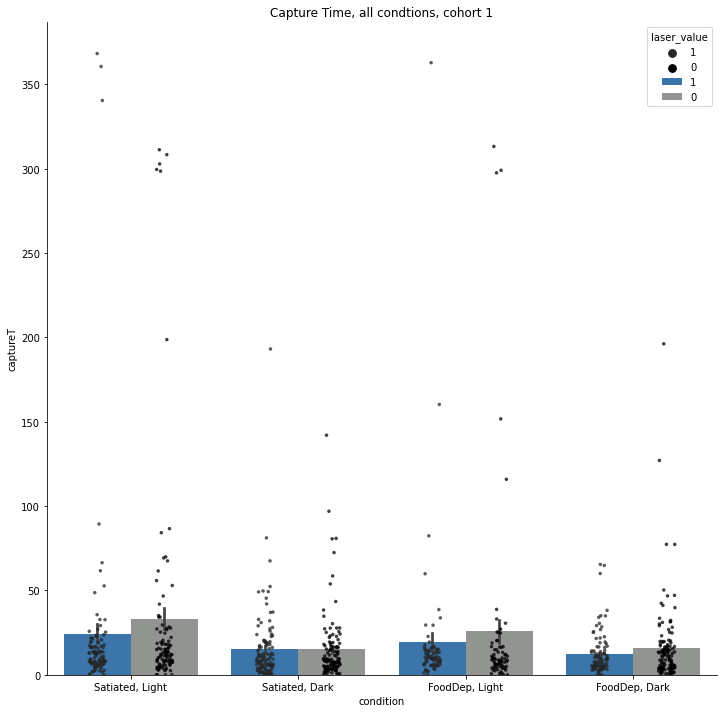

In [23]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_cohort1, x='condition', y='captureT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_cohort1, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, cohort 1')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

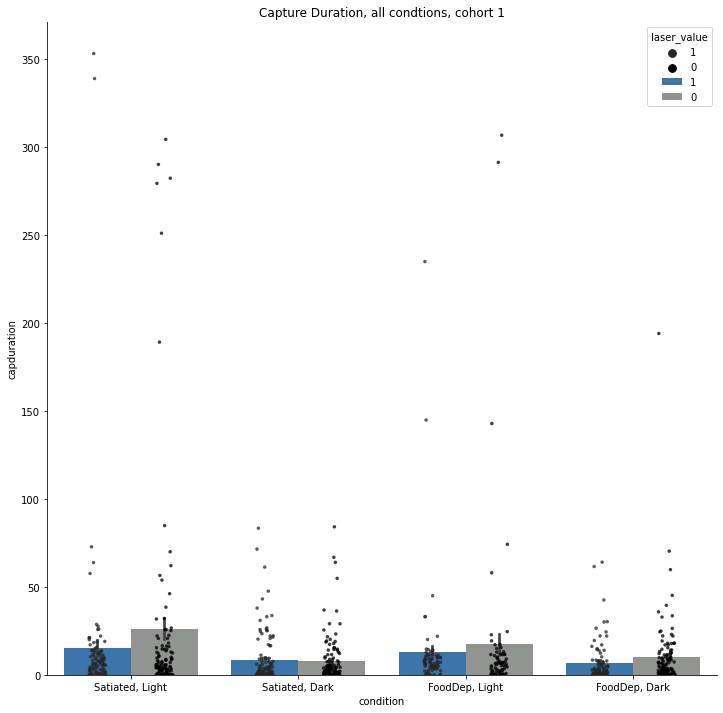

In [24]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_cohort1, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_cohort1, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, cohort 1')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

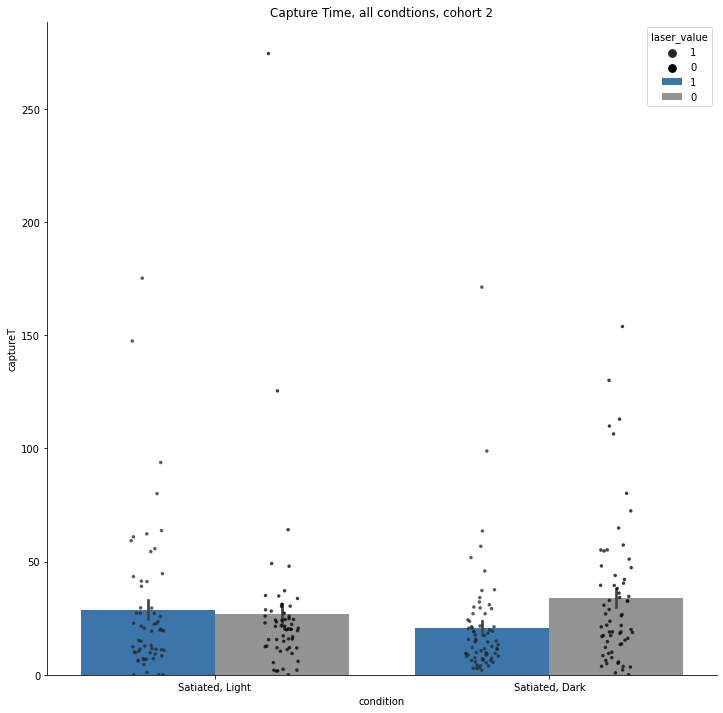

In [25]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_cohort2, x='condition', y='captureT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_cohort2, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, cohort 2')
plt.xticks([0,1],['Satiated, Light','Satiated, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

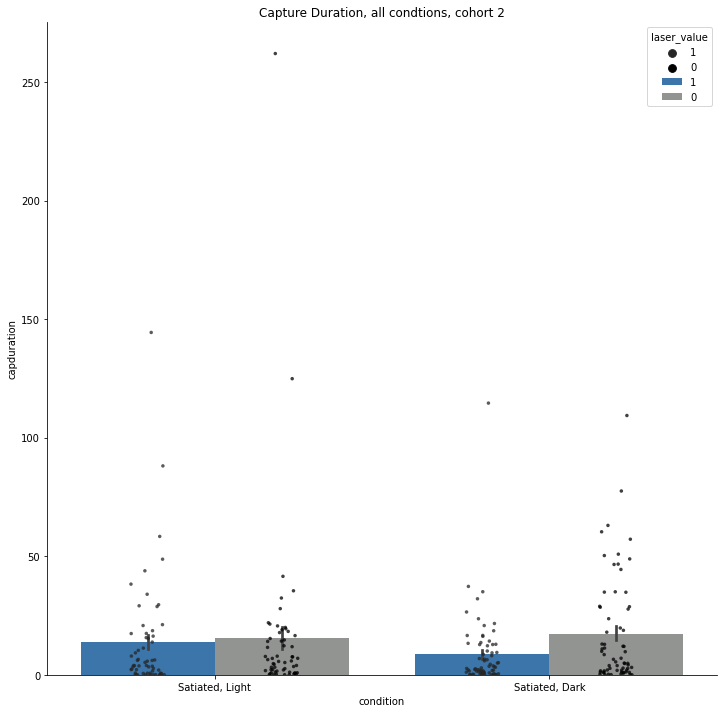

In [26]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_cohort2, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_cohort2, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, cohort 2')
plt.xticks([0,1],['Satiated, Light','Satiated, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,100,10))
sns.despine()

### Capture time and duration plots for all mice, only satiated conditions have both cohorts worth of data, food deprived are only cohort 1

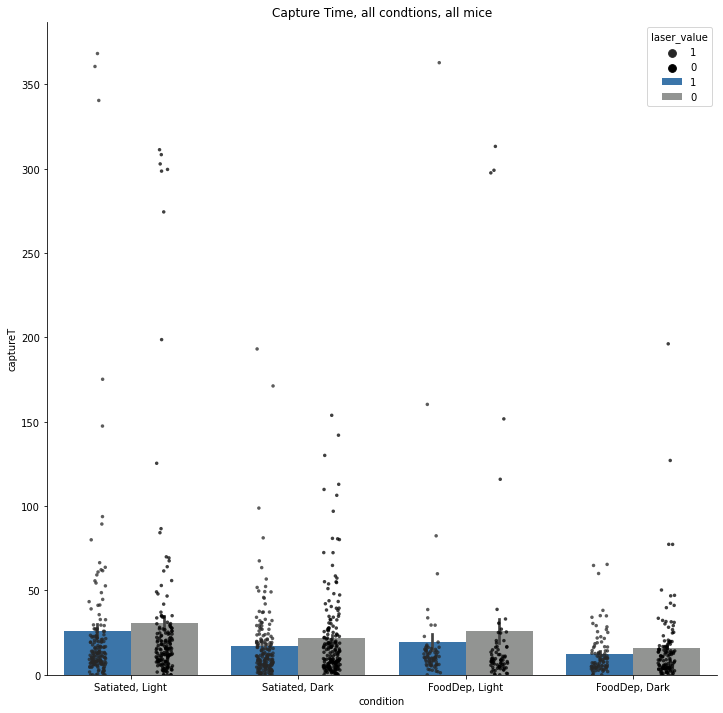

In [9]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_all, x='condition', y='captureT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=df_all, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
# plt.ylim(0,100)
# plt.yticks(np.arange(0,110,10))
sns.despine()

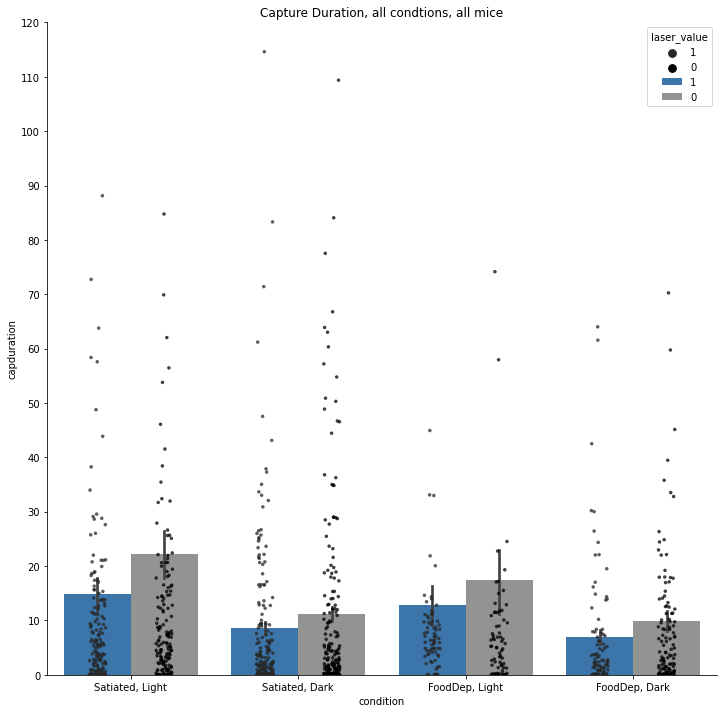

In [11]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=df_all, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=df_all, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
plt.ylim(0,100)
plt.yticks(np.arange(0,130,10))
sns.despine()

### Capture duration distributions for satiated conditions

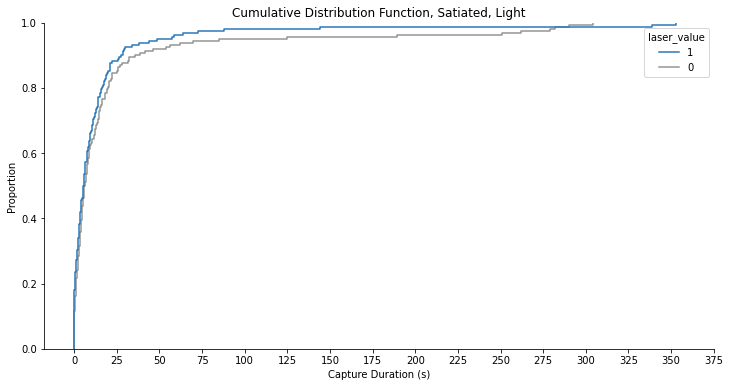

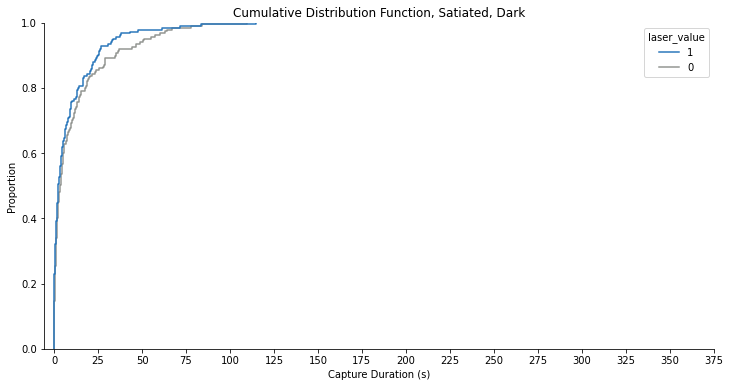

In [12]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_all.iloc[np.where(df_all['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_all.iloc[np.where(df_all['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark')
plt.xticks(np.arange(0, 400,25))
sns.despine()


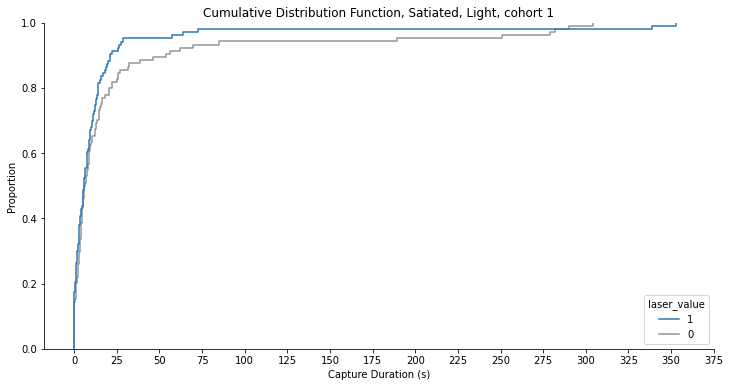

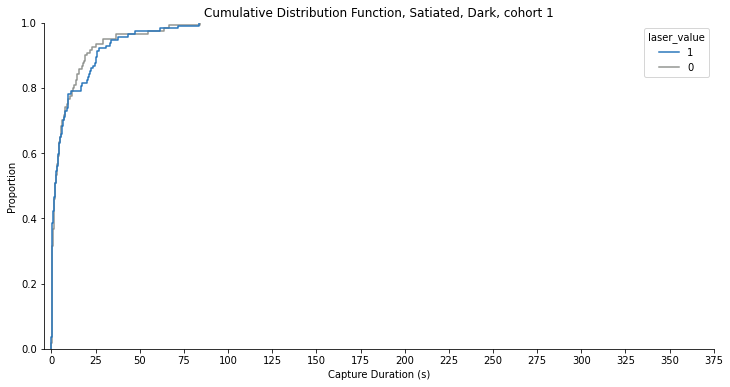

In [30]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort1.iloc[np.where(df_cohort1['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, cohort 1')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort1.iloc[np.where(df_cohort1['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, cohort 1')
plt.xticks(np.arange(0, 400,25))
sns.despine()

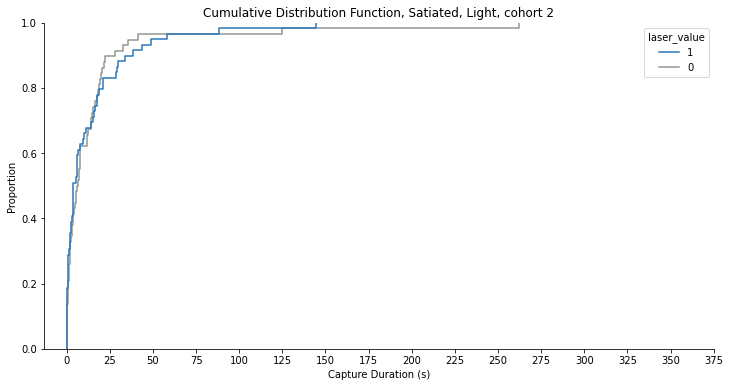

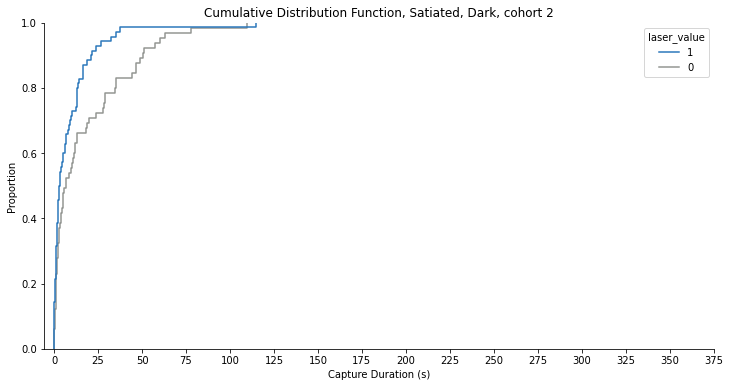

In [31]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort2.iloc[np.where(df_cohort2['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, cohort 2')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort2.iloc[np.where(df_cohort2['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, cohort 2')
plt.xticks(np.arange(0, 400,25))
sns.despine()

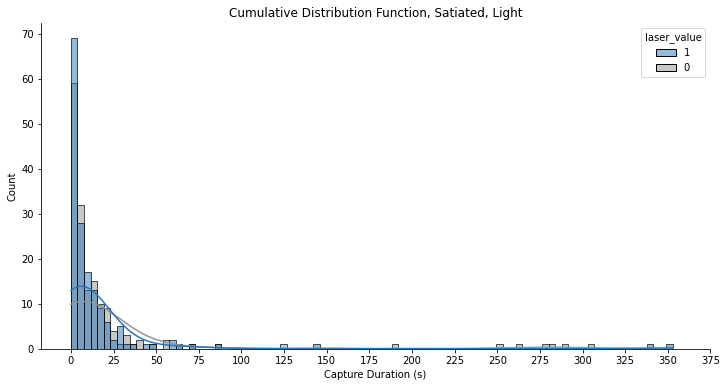

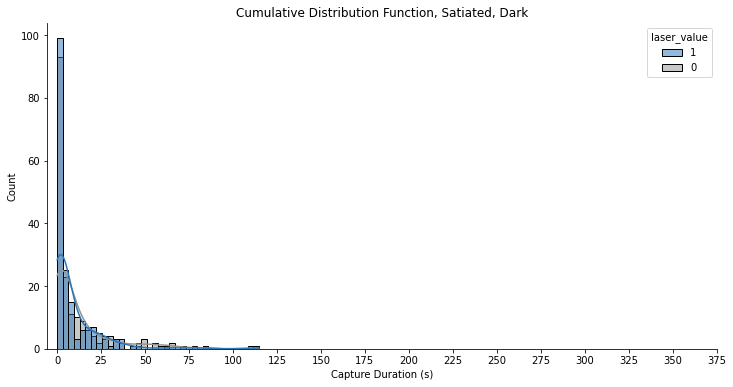

In [13]:
fig1= plt.figure(figsize=(12,6))
ax=sns.histplot(data=df_all.iloc[np.where(df_all['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, kde=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.histplot(data=df_all.iloc[np.where(df_all['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, kde=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark')
plt.xticks(np.arange(0, 400,25))
sns.despine()

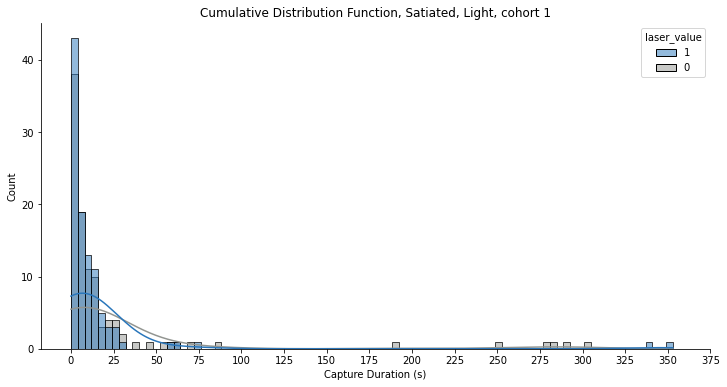

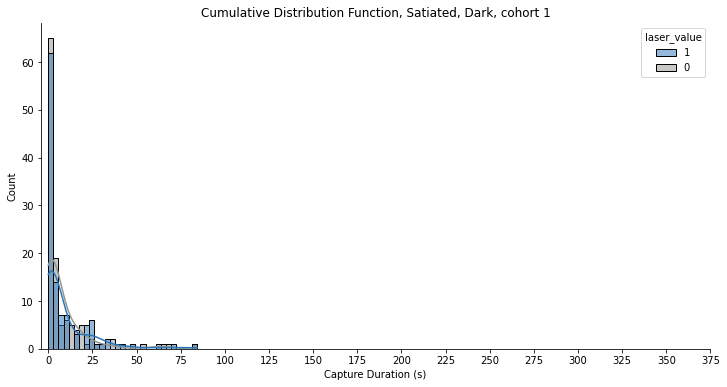

In [33]:
fig1= plt.figure(figsize=(12,6))
ax=sns.histplot(data=df_cohort1.iloc[np.where(df_cohort1['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, kde=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, cohort 1')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.histplot(data=df_cohort1.iloc[np.where(df_cohort1['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, kde=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, cohort 1')
plt.xticks(np.arange(0, 400,25))
sns.despine()

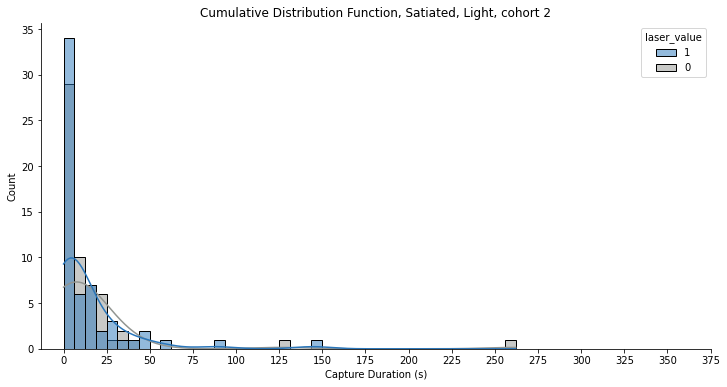

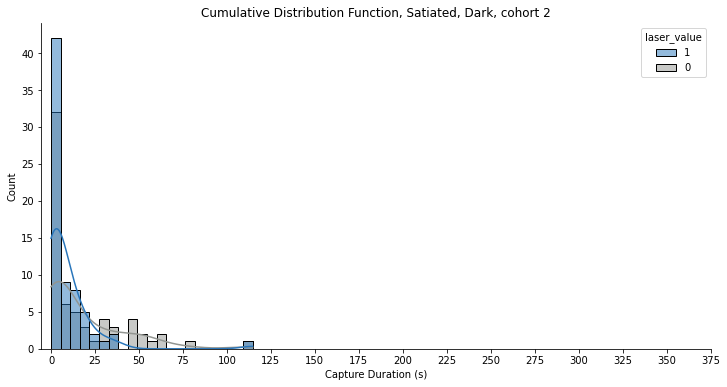

In [34]:
fig1= plt.figure(figsize=(12,6))
ax=sns.histplot(data=df_cohort2.iloc[np.where(df_cohort2['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, kde=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, cohort 2')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.histplot(data=df_cohort2.iloc[np.where(df_cohort2['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, kde=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, cohort 2')
plt.xticks(np.arange(0, 400,25))
sns.despine()

### Cricket surivial fraction in satiated conditions

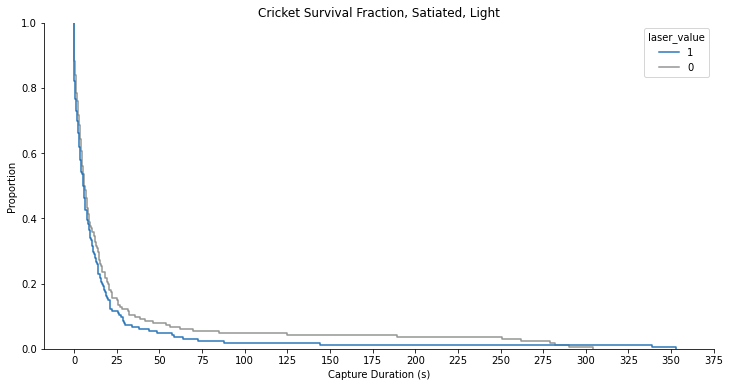

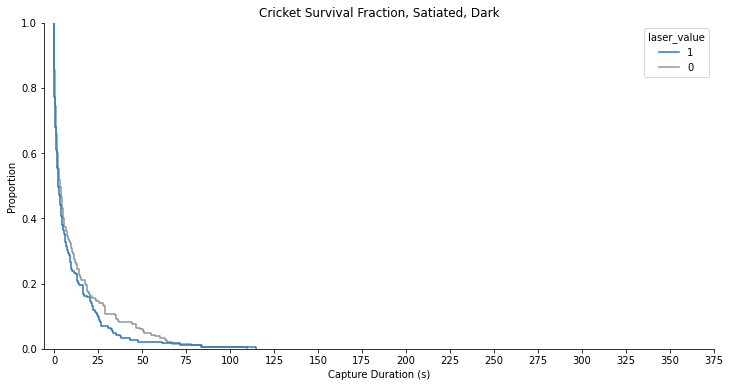

In [14]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_all.iloc[np.where(df_all['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Light')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_all.iloc[np.where(df_all['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Dark')
plt.xticks(np.arange(0, 400,25))
sns.despine()

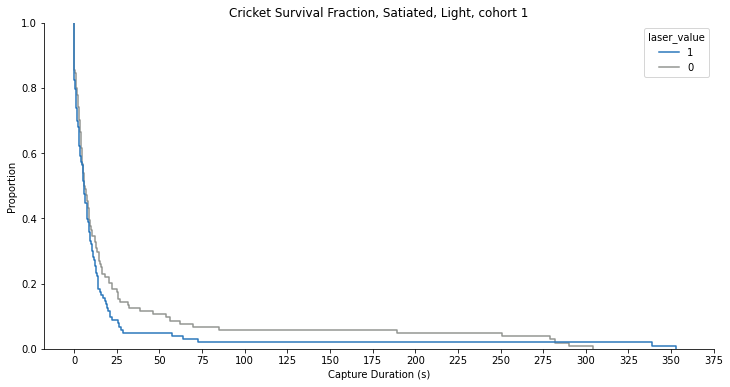

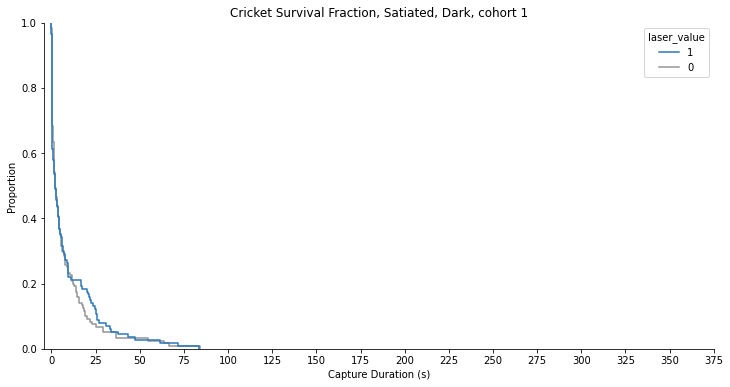

In [36]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort1.iloc[np.where(df_cohort1['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Light, cohort 1')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort1.iloc[np.where(df_cohort1['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Dark, cohort 1')
plt.xticks(np.arange(0, 400,25))
sns.despine()

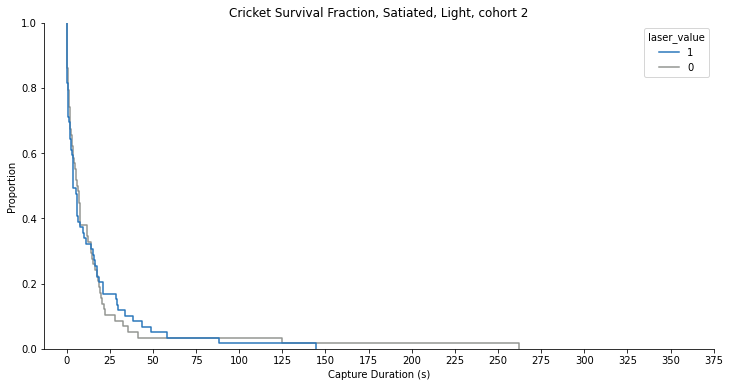

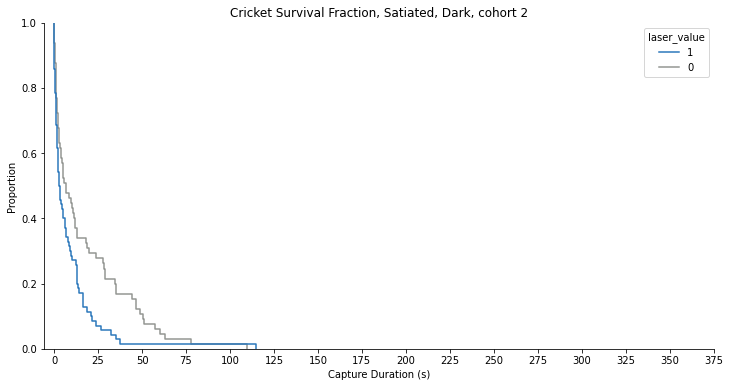

In [37]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort2.iloc[np.where(df_cohort2['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Light, cohort 2')
plt.xticks(np.arange(0, 400,25))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=df_cohort2.iloc[np.where(df_cohort2['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, complementary=True)
plt.xlabel('Capture Duration (s)')
plt.title('Cricket Survival Fraction, Satiated, Dark, cohort 2')
plt.xticks(np.arange(0, 400,25))
sns.despine()

In [8]:
std_all=df_all.groupby(['condition','laser_value']).std()
temp=std_all[['captureT', 'capduration']]
std=pd.DataFrame(temp)
std=std.reset_index()
std

,condition,laser_value,captureT,capduration
0,1.0,0.0,57.553754,54.791266
1,1.0,1.0,51.238247,41.056890
2,2.0,0.0,26.481706,17.965138
3,2.0,1.0,23.161846,15.091898
4,3.0,0.0,61.909334,51.425448
5,3.0,1.0,45.296878,31.319324
6,4.0,0.0,23.861891,20.552083
7,4.0,1.0,12.916858,11.662029


In [9]:
sem_all=df_all.groupby(['condition','laser_value']).sem()
temp=sem_all[['captureT', 'capduration']]
sem=pd.DataFrame(temp)
sem=sem.reset_index()
sem

,condition,laser_value,captureT,capduration
0,1.0,0.0,4.521850,4.304808
1,1.0,1.0,4.025657,3.225734
2,2.0,0.0,1.946974,1.320823
3,2.0,1.0,1.707514,1.112589
4,3.0,0.0,7.245939,6.018893
5,3.0,1.0,5.230433,3.616444
6,4.0,0.0,2.169263,1.868371
7,4.0,1.0,1.354055,1.222513


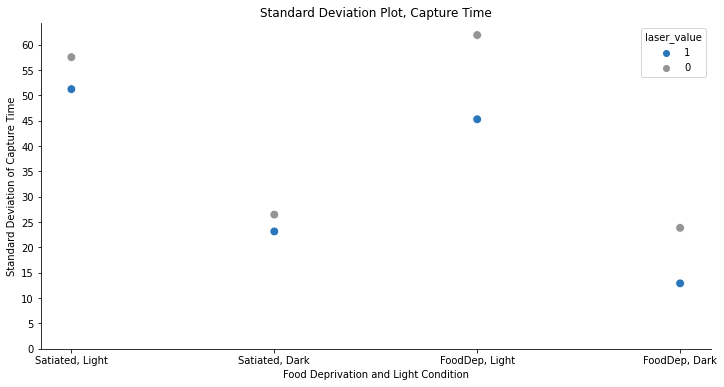

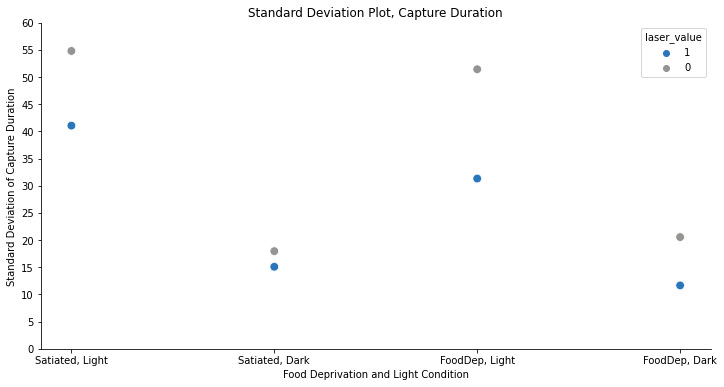

In [17]:
fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=std,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette=palette, s=75)
plt.xticks([1,2,3,4],['Satiated, Light',  'Satiated, Dark', 'FoodDep, Light','FoodDep, Dark'])
plt.yticks(np.arange(0,65,5))
plt.ylabel('Standard Deviation of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Time')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=std,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette=palette, s=75)
plt.xticks([1,2,3,4],['Satiated, Light', 'Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
plt.yticks(np.arange(0,65,5))
plt.ylabel('Standard Deviation of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Duration')
sns.despine()

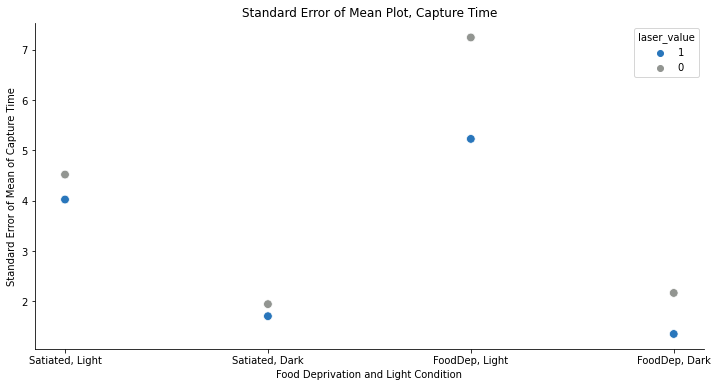

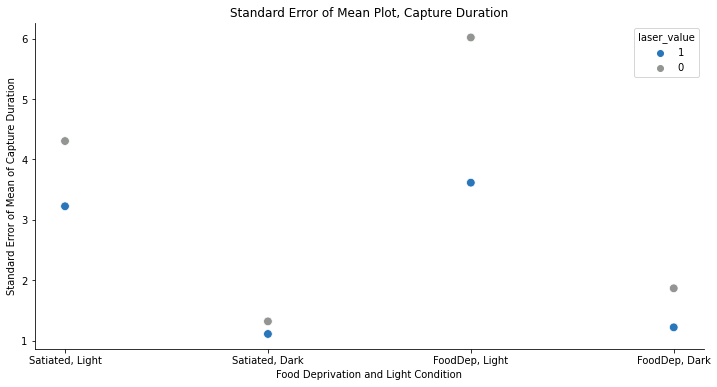

In [18]:
fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=sem,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette=palette, s=75)
plt.xticks([1,2,3,4],['Satiated, Light',  'Satiated, Dark', 'FoodDep, Light','FoodDep, Dark'])
plt.ylabel('Standard Error of Mean of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Error of Mean Plot, Capture Time')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=sem,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette=palette, s=75)
plt.xticks([1,2,3,4],['Satiated, Light', 'Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
plt.ylabel('Standard Error of Mean of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Error of Mean Plot, Capture Duration')
sns.despine()

### Limit data to captures under 120s (only the first laser on duration) and see what things look like 

In [10]:
nandf=cdc(df_all)
nans=np.where(nandf['captureT']>=120)
nanvals=nandf['captureT'].iloc[nans[0]]
nandf=nandf.replace({'captureT':nanvals.values}, np.nan)

nandf['capduration']=nandf['captureT']-nandf['timetointercept']

In [21]:
nandf_old=cdc(df_all_old)
nans=np.where(nandf_old['captureT']>=120)
nanvals=nandf_old['captureT'].iloc[nans[0]]
nandf_old=nandf_old.replace({'captureT':nandf_old.values}, np.nan)

nandf_old['capduration']=nandf_old['captureT']-nandf_old['timetointercept']

NameError: name 'df_all_old' is not defined

In [11]:
nandf

,filename,folder_path,condition,laser_value,circle,dist,cricket_spd,mouse_spd,az,captureT,cricketdrop,captureframe,freqapproach,timetoapproach,prob_inter,prob_capture,timetointercept,interceptframe,capduration
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-05-07_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.4692367137209918, 2.779779701312001, 3.2017...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19.145,2312.0,6141.0,0.206986,4.360,0.875000,0.142857,5.350,1070.0,13.795
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-07-02_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.757072790716952, 9.362620173911946, 9.82083...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7.435,2005.0,3492.0,0.126763,0.315,0.750000,0.333333,1.970,394.0,5.465
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-12-42_mouse-0897,1.0,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0548578586351982, 1.1435315586646064, 1.217...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.665,2246.0,2579.0,0.039494,0.265,1.000000,1.000000,1.640,328.0,0.025
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-14-33_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.447304574249497, 8.829336439003862, 10.5655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8.040,1781.0,3389.0,0.112360,2.830,0.500000,1.000000,3.460,692.0,4.580
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-02-22_10-16-01_mouse-0897,1.0,0.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.550975346948177, 5.2380705840289234, 5.6036...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6.510,1125.0,2427.0,0.095671,4.755,1.000000,0.500000,5.670,1134.0,0.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-36-44_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.522058132266212, 10.856752087956144, 12.906...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",28.030,1688.0,7294.0,0.304507,2.015,0.666667,0.100000,3.575,715.0,24.455
1725,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-38-50_mouse-0895,NaN,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.264606355391132, 14.304610560575007, 17.92...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10.995,935.0,3134.0,0.246957,1.615,0.666667,0.250000,2.330,466.0,8.665
1726,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-40-26_mouse-0895,NaN,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",30.835,1731.0,7898.0,0.186585,0.580,0.222222,0.500000,14.760,2952.0,16.075
1729,/Volumes/Projects/PreyCapture/ZIActivation/202...,2022-08-25_9-56-17_mouse-0893,2.0,0.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.1924219234042677, 2.9813598229081495, 3.178...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",36.095,869.0,8088.0,0.286885,0.190,0.214286,0.333333,29.560,5912.0,6.535


In [12]:
mean_nandf=nandf.groupby(['condition','laser_value']).mean()
mean_nandf

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                   
1.0       0.0          0.641975  18.661981  1579.709877   7744.364198   
          1.0          0.635802  17.887739  2064.419753   7250.314815   
2.0       0.0          0.648649  19.636154  1653.491892   5977.551351   
          1.0          0.619565  15.507500  1986.668478   5450.586957   
3.0       0.0          1.000000  11.864420  1770.123288   6921.808219   
          1.0          1.000000  12.781986  1707.800000   5591.293333   
4.0       0.0          1.000000  13.612269  1745.545455   4957.380165   
          1.0          1.000000  12.606703  2451.241758   4972.582418   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.133399        3.289167    0.608938      0.500064   
          1.0              0.111064        3.923981    0.663043      0.525336   
2.0       0.0              0.121245        2.594703    0.592340      0.621240   
          1.0              0.105455        3.023342    0.601340      0.647936   
3.0       0.0              0.113358        1.889521    0.763231      0.493703   
          1.0              0.124442        1.493733    0.765816      0.399385   
4.0       0.0              0.100206        3.110909    0.703384      0.564692   
          1.0              0.094091        1.973077    0.638886      0.580538   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 8.511605     1702.320988    10.596623  
          1.0                11.059414     2211.882716     9.849013  
2.0       0.0                10.482135     2096.427027    10.880000  
          1.0                 8.675326     1735.065217     7.651703  
3.0       0.0                 8.247671     1649.534247     6.953623  
          1.0                 6.598333     1319.666667     7.970616  
4.0       0.0                 6.172190     1234.438017     8.388697  
          1.0                 5.637308     1127.461538     6.969396

In [13]:
mean_df=df_all.groupby(['condition','laser_value']).mean()
mean_df

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                   
1.0       0.0          0.641975  30.823272  1579.709877   7744.364198   
          1.0          0.635802  25.929475  2064.419753   7250.314815   
2.0       0.0          0.648649  21.620297  1653.491892   5977.551351   
          1.0          0.619565  17.319592  1986.668478   5450.586957   
3.0       0.0          1.000000  25.758425  1770.123288   6921.808219   
          1.0          1.000000  19.417467  1707.800000   5591.293333   
4.0       0.0          1.000000  16.059174  1745.545455   4957.380165   
          1.0          1.000000  12.606703  2451.241758   4972.582418   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.133399        3.289167    0.608938      0.500064   
          1.0              0.111064        3.923981    0.663043      0.525336   
2.0       0.0              0.121245        2.594703    0.592340      0.621240   
          1.0              0.105455        3.023342    0.601340      0.647936   
3.0       0.0              0.113358        1.889521    0.763231      0.493703   
          1.0              0.124442        1.493733    0.765816      0.399385   
4.0       0.0              0.100206        3.110909    0.703384      0.564692   
          1.0              0.094091        1.973077    0.638886      0.580538   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 8.511605     1702.320988    22.311667  
          1.0                11.059414     2211.882716    14.870062  
2.0       0.0                10.482135     2096.427027    11.138162  
          1.0                 8.675326     1735.065217     8.644266  
3.0       0.0                 8.247671     1649.534247    17.510753  
          1.0                 6.598333     1319.666667    12.819133  
4.0       0.0                 6.172190     1234.438017     9.886983  
          1.0                 5.637308     1127.461538     6.969396

In [47]:
mean_nandfold=nandf_old.groupby(['condition','laser_value']).mean()
mean_nandfold

circle   captureT  freqapproach  timetoapproach  \
condition laser_value                                                      
1.0       0.0          0.641975  30.823272      0.133399        3.289167   
          1.0          0.635802  25.929475      0.111064        3.923981   
2.0       0.0          0.648649  21.620297      0.121245        2.594703   
          1.0          0.619565  17.319592      0.105455        3.023342   
3.0       0.0          1.000000  25.758425      0.113358        1.889521   
          1.0          1.000000  19.417467      0.124442        1.493733   
4.0       0.0          1.000000  16.059174      0.100206        3.110909   
          1.0          1.000000  12.606703      0.094091        1.973077   

                       prob_inter  prob_capture  timetointercept  capduration  
condition laser_value                                                          
1.0       0.0            0.608938      0.500064         8.511605    22.311667  
          1.0            0.663043      0.525336        11.059414    14.870062  
2.0       0.0            0.592340      0.621240        10.482135    11.138162  
          1.0            0.601340      0.647936         8.675326     8.644266  
3.0       0.0            0.763231      0.493703         8.247671    17.510753  
          1.0            0.765816      0.399385         6.598333    12.819133  
4.0       0.0            0.703384      0.564692         6.172190     9.886983  
          1.0            0.638886      0.580538         5.637308     6.969396

In [48]:
mean_df_old=df_all_old.groupby(['condition','laser_value']).mean()
mean_df_old

circle   captureT  freqapproach  timetoapproach  \
condition laser_value                                                      
1.0       0.0          0.641975  30.823272      0.133399        3.289167   
          1.0          0.635802  25.929475      0.111064        3.923981   
2.0       0.0          0.648649  21.620297      0.121245        2.594703   
          1.0          0.619565  17.319592      0.105455        3.023342   
3.0       0.0          1.000000  25.758425      0.113358        1.889521   
          1.0          1.000000  19.417467      0.124442        1.493733   
4.0       0.0          1.000000  16.059174      0.100206        3.110909   
          1.0          1.000000  12.606703      0.094091        1.973077   

                       prob_inter  prob_capture  timetointercept  capduration  
condition laser_value                                                          
1.0       0.0            0.608938      0.500064         8.511605    22.311667  
          1.0            0.663043      0.525336        11.059414    14.870062  
2.0       0.0            0.592340      0.621240        10.482135    11.138162  
          1.0            0.601340      0.647936         8.675326     8.644266  
3.0       0.0            0.763231      0.493703         8.247671    17.510753  
          1.0            0.765816      0.399385         6.598333    12.819133  
4.0       0.0            0.703384      0.564692         6.172190     9.886983  
          1.0            0.638886      0.580538         5.637308     6.969396

In [14]:
med_nandf=nandf.groupby(['condition','laser_value']).median()
med_nandf

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                
1.0       0.0             1.0   15.0625       1510.0        4913.0   
          1.0             1.0   12.7100       1825.5        4627.5   
2.0       0.0             1.0   12.6875       1431.0        4128.0   
          1.0             1.0   10.6150       1757.5        4051.0   
3.0       0.0             1.0    8.4050       1638.0        3422.0   
          1.0             1.0   10.0650       1656.0        3766.0   
4.0       0.0             1.0    9.6150       1487.0        3620.0   
          1.0             1.0    8.6800       2098.0        4117.0   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.118688          1.2775    0.571429      0.500000   
          1.0              0.102269          2.4275    0.683333      0.416667   
2.0       0.0              0.111212          1.5400    0.500000      0.500000   
          1.0              0.094754          1.2675    0.500000      0.500000   
3.0       0.0              0.099256          1.0200    1.000000      0.333333   
          1.0              0.115490          0.6000    0.800000      0.333333   
4.0       0.0              0.080096          1.0750    0.666667      0.500000   
          1.0              0.080743          1.0350    0.600000      0.500000   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                   5.7700          1154.0       5.6850  
          1.0                   5.5125          1102.5       5.3400  
2.0       0.0                   5.4650          1093.0       3.1325  
          1.0                   5.6700          1134.0       2.2850  
3.0       0.0                   3.4600           692.0       4.9650  
          1.0                   2.8150           563.0       6.3400  
4.0       0.0                   3.2300           646.0       3.6200  
          1.0                   4.1950           839.0       2.3800

In [15]:
std_nandf=nandf.groupby(['condition','laser_value']).std()
std_nandf

circle   captureT  cricketdrop  captureframe  \
condition laser_value                                                   
1.0       0.0          0.480906  16.234374   824.092572  11471.785316   
          1.0          0.482697  17.398089  1240.115020  10419.385531   
2.0       0.0          0.478688  21.615546  1050.644751   5628.886642   
          1.0          0.486818  15.404641  1092.748524   4824.590866   
3.0       0.0          0.000000  15.087848  1153.235918  12410.441063   
          1.0          0.000000  12.237441   551.685599   9084.232746   
4.0       0.0          0.000000  13.909529  2090.716440   5779.651625   
          1.0          0.000000  12.916858  2107.079756   3397.627852   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.077682        4.614721    0.292254      0.330505   
          1.0              0.070300        5.196449    0.306342      0.344090   
2.0       0.0              0.071024        3.075578    0.312903      0.339371   
          1.0              0.060524        3.947094    0.308629      0.360712   
3.0       0.0              0.075094        2.184076    0.287230      0.337845   
          1.0              0.067548        2.667089    0.251368      0.267196   
4.0       0.0              0.063662        9.758755    0.276388      0.341556   
          1.0              0.058394        2.629277    0.291307      0.360486   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 9.171929     1834.385864    13.871907  
          1.0                30.632001     6126.400296    14.181292  
2.0       0.0                16.823329     3364.665900    17.811259  
          1.0                12.546540     2509.307989    11.680647  
3.0       0.0                28.212034     5642.406884    10.101422  
          1.0                16.648688     3329.737602     7.617354  
4.0       0.0                11.889778     2377.955599    11.830218  
          1.0                 4.870243      974.048531    11.662029

In [16]:
sem_nandf=nandf.groupby(['condition','laser_value']).sem()
sem_nandf

circle  captureT  cricketdrop  captureframe  \
condition laser_value                                                  
1.0       0.0          0.037784  1.308203    64.746827    901.308577   
          1.0          0.037924  1.388519    97.432638    818.624241   
2.0       0.0          0.035194  1.602251    77.244938    413.843977   
          1.0          0.035889  1.141868    80.558490    355.673557   
3.0       0.0          0.000000  1.816363   134.976055   1452.532259   
          1.0          0.000000  1.432284    63.703166   1048.956844   
4.0       0.0          0.000000  1.275084   190.065131    525.422875   
          1.0          0.000000  1.354055   220.881976    356.168176   

                       freqapproach  timetoapproach  prob_inter  prob_capture  \
condition laser_value                                                           
1.0       0.0              0.006103        0.362567    0.022962      0.025967   
          1.0              0.005523        0.408272    0.024069      0.027034   
2.0       0.0              0.005222        0.226121    0.023005      0.024951   
          1.0              0.004462        0.290984    0.022752      0.026592   
3.0       0.0              0.008789        0.255627    0.033618      0.039542   
          1.0              0.007800        0.307969    0.029025      0.030853   
4.0       0.0              0.005787        0.887160    0.025126      0.031051   
          1.0              0.006121        0.275623    0.030537      0.037789   

                       timetointercept  interceptframe  capduration  
condition laser_value                                                
1.0       0.0                 0.720615      144.122965     1.117830  
          1.0                 2.406677      481.335466     1.131790  
2.0       0.0                 1.236876      247.375157     1.320258  
          1.0                 0.924943      184.988639     0.865827  
3.0       0.0                 3.301969      660.393775     1.216068  
          1.0                 1.922425      384.484980     0.891544  
4.0       0.0                 1.080889      216.177782     1.084474  
          1.0                 0.510540      102.108030     1.222513

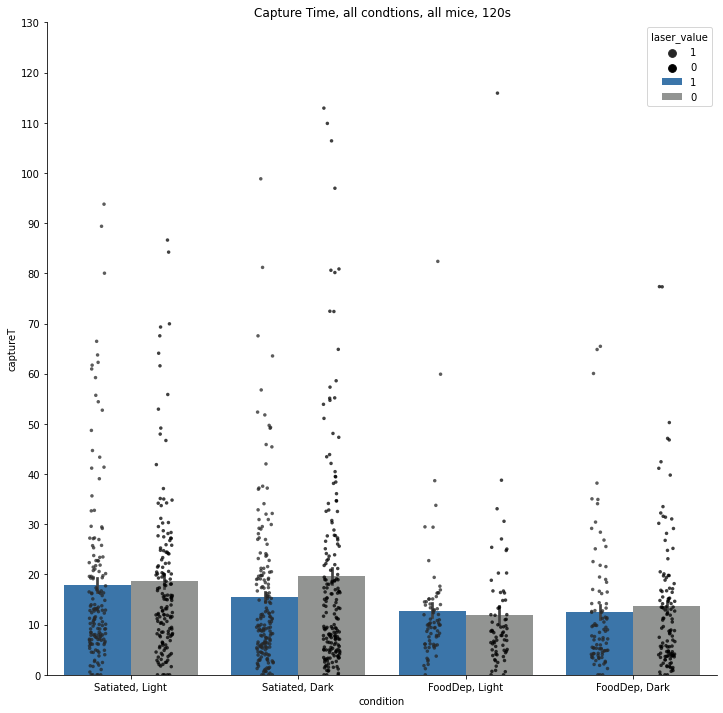

In [17]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=nandf, x='condition', y='captureT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=nandf, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
# plt.ylim(0,130)
plt.yticks(np.arange(0,140,10))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/captureTallmiceallcond.pdf')

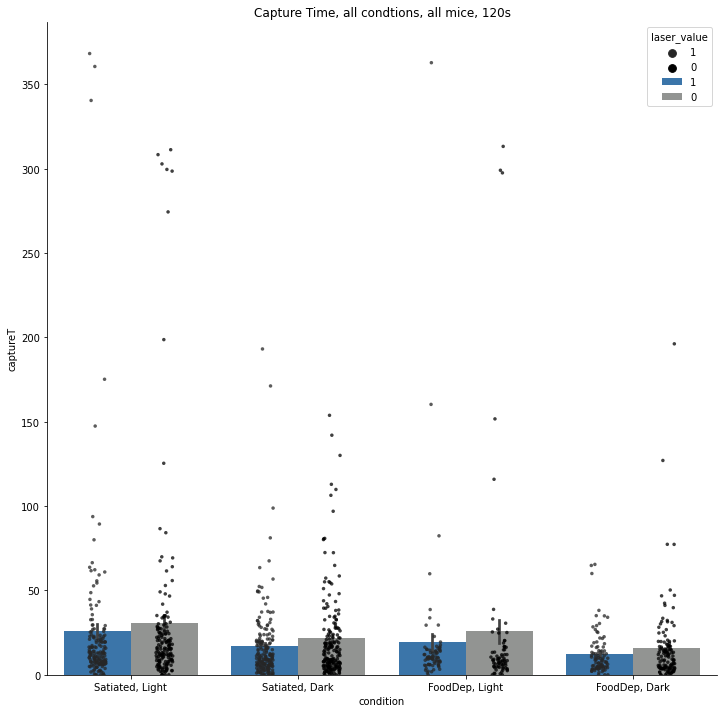

In [73]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=nandf_old, x='condition', y='captureT', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='captureT', hue='laser_value',dodge=True, data=nandf_old, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Time, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
# plt.ylim(0,130)
# plt.yticks(np.arange(0,140,10))
sns.despine()

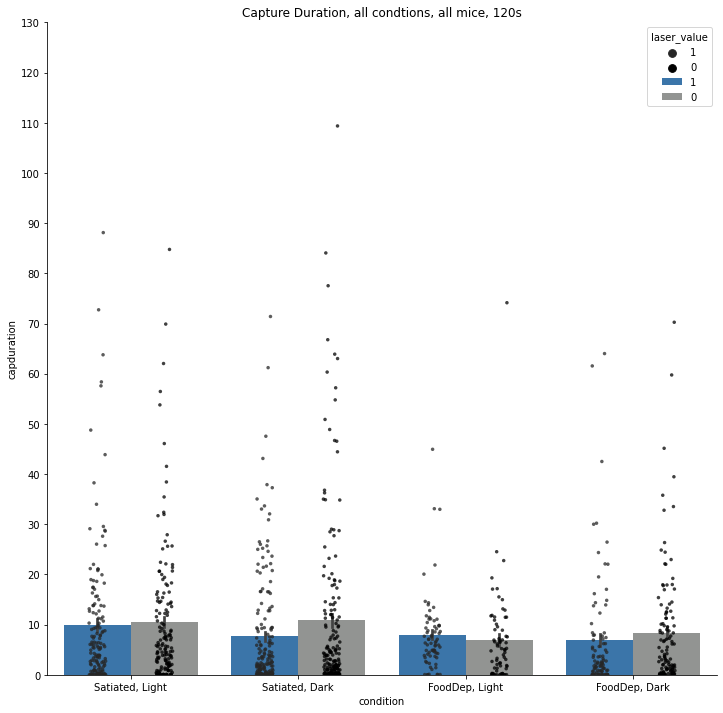

In [18]:
plt.figure(figsize=(12,12))
ax=sns.barplot(data=nandf, x='condition', y='capduration', hue='laser_value', ci=68, palette=palette, hue_order=hue_order)
ax= sns.stripplot(x='condition', y='capduration', hue='laser_value',dodge=True, data=nandf, color='black', size=3.5, alpha=0.75, hue_order=hue_order)
plt.title('Capture Duration, all condtions, all mice, 120s')
plt.xticks([0,1,2,3],['Satiated, Light','Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
# plt.ylim(0,130)
plt.yticks(np.arange(0,140,10))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/capdurationallmiceallcond.pdf')

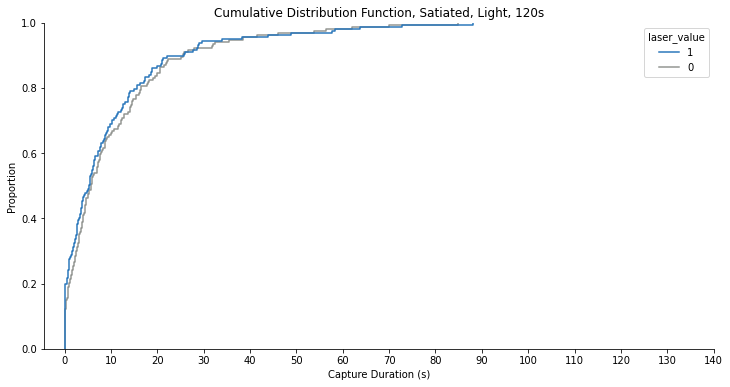

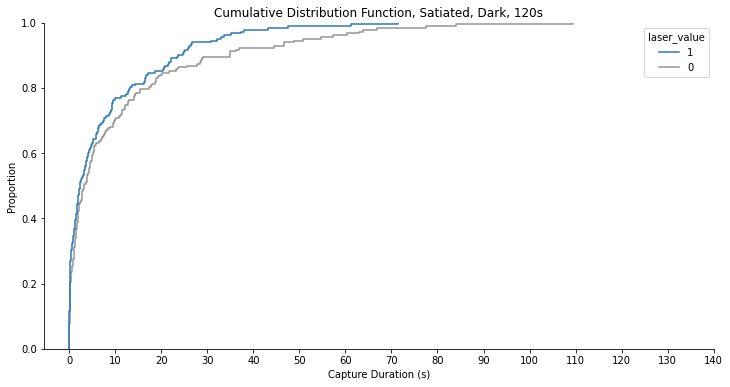

In [30]:
fig1= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=nandf.iloc[np.where(nandf['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Light, 120s')
plt.xticks(np.arange(0, 150,10))
sns.despine()

fig2= plt.figure(figsize=(12,6))
ax=sns.ecdfplot(data=nandf.iloc[np.where(nandf['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette)
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, Dark, 120s')
plt.xticks(np.arange(0, 150,10))
sns.despine()


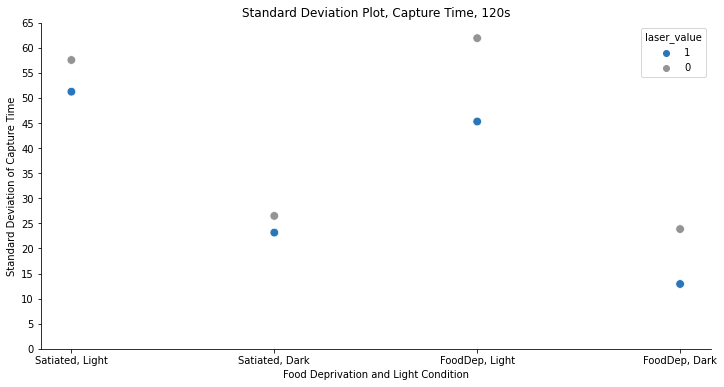

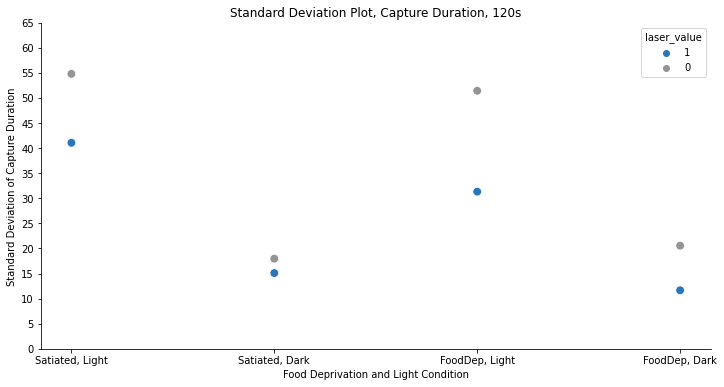

In [31]:
std_nan=nandf.groupby(['condition','laser_value']).std()
temp=std_nan[['captureT', 'capduration']]
nanstd=pd.DataFrame(temp)
nanstd=std.reset_index()
nanstd

fig1= plt.figure(figsize=(12,6))
sns.scatterplot(data=nanstd,x='condition', y='captureT', hue='laser_value', hue_order=hue_order, palette=palette, s=75)
plt.xticks([1,2,3,4],['Satiated, Light',  'Satiated, Dark', 'FoodDep, Light','FoodDep, Dark'])
plt.yticks(np.arange(0,70,5))
plt.ylabel('Standard Deviation of Capture Time')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Time, 120s')
sns.despine()

fig2= plt.figure(figsize=(12,6))
sns.scatterplot(data=nanstd,x='condition', y='capduration', hue='laser_value', hue_order=hue_order, palette=palette, s=75)
plt.xticks([1,2,3,4],['Satiated, Light', 'Satiated, Dark', 'FoodDep, Light', 'FoodDep, Dark'])
plt.yticks(np.arange(0,70,5))
plt.ylabel('Standard Deviation of Capture Duration')
plt.xlabel('Food Deprivation and Light Condition')
plt.title('Standard Deviation Plot, Capture Duration, 120s')
sns.despine()

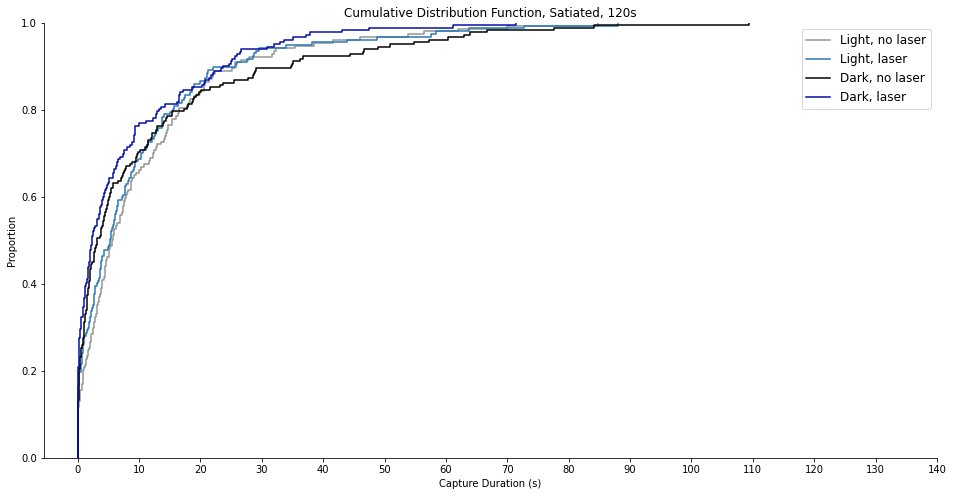

In [32]:
darkpalette=['#030aa7','#000000']
labels=['Light, no laser','Light, laser','Dark, no laser', 'Dark, laser']
fig1= plt.figure(figsize=(16,8))
ax=sns.ecdfplot(data=nandf.iloc[np.where(nandf['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, legend=True)
ax1=sns.ecdfplot(data=nandf.iloc[np.where(nandf['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=darkpalette)
ax.legend(labels=labels, fontsize='large')
plt.xlabel('Capture Duration (s)')
plt.title('Cumulative Distribution Function, Satiated, 120s')
plt.xticks(np.arange(0, 150,10))
sns.despine()

# plt.savefig('/Users/mollyshallow/Desktop/capduration_distallmiceallcond.pdf')

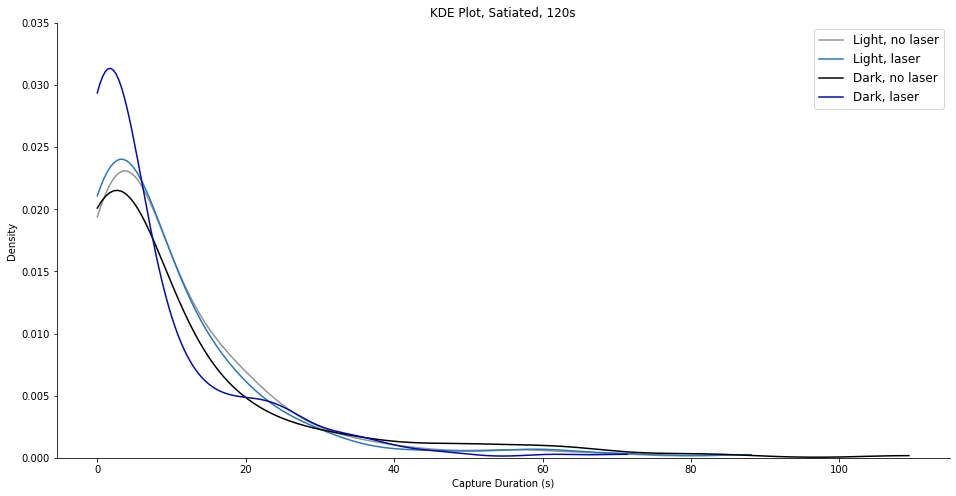

In [33]:
labels=['Light, no laser','Light, laser','Dark, no laser', 'Dark, laser']
fig1= plt.figure(figsize=(16,8))
ax=sns.kdeplot(data=nandf.iloc[np.where(nandf['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, legend=True, cut=0)
ax1=sns.kdeplot(data=nandf.iloc[np.where(nandf['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=darkpalette, cut=0)
ax.legend(labels=labels, fontsize='large')
plt.xlabel('Capture Duration (s)')
plt.title('KDE Plot, Satiated, 120s')
# plt.xticks(np.arange(0, 150,10))
plt.yticks(np.arange(0, 0.035, 0.005))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/SfNPoster/capduration_kdeallmiceallcond.pdf')

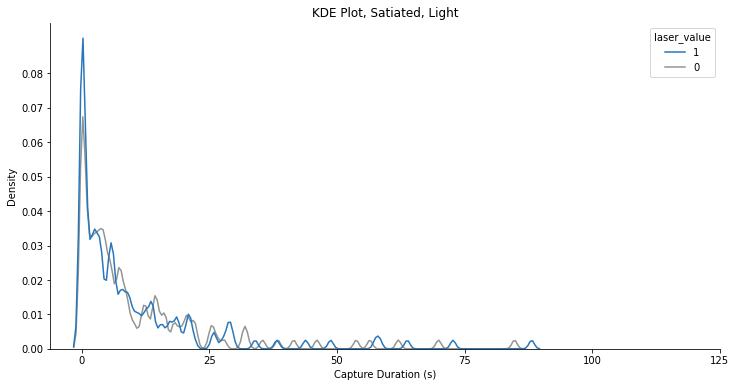

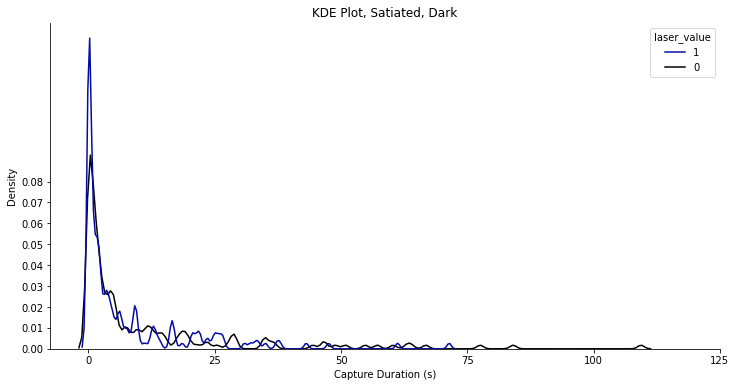

In [135]:
fig1= plt.figure(figsize=(12,6))
ax=sns.kdeplot(data=nandf.iloc[np.where(nandf['condition']==1)], x='capduration', hue='laser_value',hue_order=hue_order, palette=palette, legend=True, bw_adjust=0.2)
plt.xlabel('Capture Duration (s)')
plt.title('KDE Plot, Satiated, Light')
plt.xticks(np.arange(0, 150,25))
plt.yticks(np.arange(0, 0.09,0.01))
# ax.legend(labels=labels, fontsize='large')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/SfNPoster/capduration_kdeallmicelight.pdf')

fig2= plt.figure(figsize=(12,6))
ax1=sns.kdeplot(data=nandf.iloc[np.where(nandf['condition']==2)], x='capduration', hue='laser_value',hue_order=hue_order, palette=darkpalette, bw_adjust=0.2)
plt.xlabel('Capture Duration (s)')
plt.title('KDE Plot, Satiated, Dark')
# ax.legend(labels=labels, fontsize='large')
plt.xticks(np.arange(0, 150,25))
plt.yticks(np.arange(0, 0.09,0.01))
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/SfNPoster/capduration_kdeallmicedark.pdf')

In [80]:
observations=nandf[['filename', 'condition', 'laser_value','dist','cricket_spd', 'mouse_spd', 'az', 'captureframe','cricketdrop','interceptframe', 'capduration']]
observations['absoluteintercept']=observations['cricketdrop']+observations['interceptframe']

<ipython-input-80-5c8af4d3fe18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations['absoluteintercept']=observations['cricketdrop']+observations['interceptframe']


In [81]:
observations

,filename,condition,laser_value,dist,cricket_spd,mouse_spd,az,captureframe,cricketdrop,interceptframe,capduration,absoluteintercept
0,/Volumes/Projects/PreyCapture/ZIActivation/202...,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.4692367137209918, 2.779779701312001, 3.2017...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",6141.0,2312.0,1070.0,13.795,3382.0
1,/Volumes/Projects/PreyCapture/ZIActivation/202...,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.757072790716952, 9.362620173911946, 9.82083...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",3492.0,2005.0,394.0,5.465,2399.0
2,/Volumes/Projects/PreyCapture/ZIActivation/202...,1.0,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.0548578586351982, 1.1435315586646064, 1.217...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2579.0,2246.0,328.0,0.025,2574.0
3,/Volumes/Projects/PreyCapture/ZIActivation/202...,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[8.447304574249497, 8.829336439003862, 10.5655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",3389.0,1781.0,692.0,4.580,2473.0
4,/Volumes/Projects/PreyCapture/ZIActivation/202...,1.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[5.550975346948177, 5.2380705840289234, 5.6036...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2427.0,1125.0,1134.0,0.840,2259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1724,/Volumes/Projects/PreyCapture/ZIActivation/202...,NaN,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[7.522058132266212, 10.856752087956144, 12.906...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7294.0,1688.0,715.0,24.455,2403.0
1725,/Volumes/Projects/PreyCapture/ZIActivation/202...,NaN,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14.264606355391132, 14.304610560575007, 17.92...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",3134.0,935.0,466.0,8.665,1401.0
1726,/Volumes/Projects/PreyCapture/ZIActivation/202...,NaN,1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7898.0,1731.0,2952.0,16.075,4683.0
1729,/Volumes/Projects/PreyCapture/ZIActivation/202...,2.0,0.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2.1924219234042677, 2.9813598229081495, 3.178...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",8088.0,869.0,5912.0,6.535,6781.0


In [82]:
cond1=observations.iloc[np.where(observations['condition']==1)]
cond1_laser=cond1.iloc[np.where(cond1['laser_value']==1)]
cond1_nolaser=cond1.iloc[np.where(cond1['laser_value']==0)]

cond2=observations.iloc[np.where(observations['condition']==2)]
cond2_laser=cond2.iloc[np.where(cond2['laser_value']==1)]
cond2_nolaser=cond2.iloc[np.where(cond2['laser_value']==0)]

In [88]:
failures=cond1_laser['capduration'].isna().sum()
successes=cond1_laser['capduration'].notna().sum()

In [89]:
successes

157

In [129]:
dist=observations['dist'][0]
clip_dist=dist[intercept:capture]

az=observations['az'][0]
clip_az=az[intercept:capture]

spd=observations['mouse_spd'][0]
clip_spd=spd[intercept:capture]

cricket=observations['cricket_spd'][0]
clip_cricket=cricket[intercept:capture]

In [126]:
drop=int(np.asarray([observations['cricketdrop'][0]])[0])
print(drop)
intercept=int(np.asarray([observations['absoluteintercept'][0]])[0])
print(intercept)
capture=int(np.asarray([observations['captureframe'][0]])[0])

2312
3382


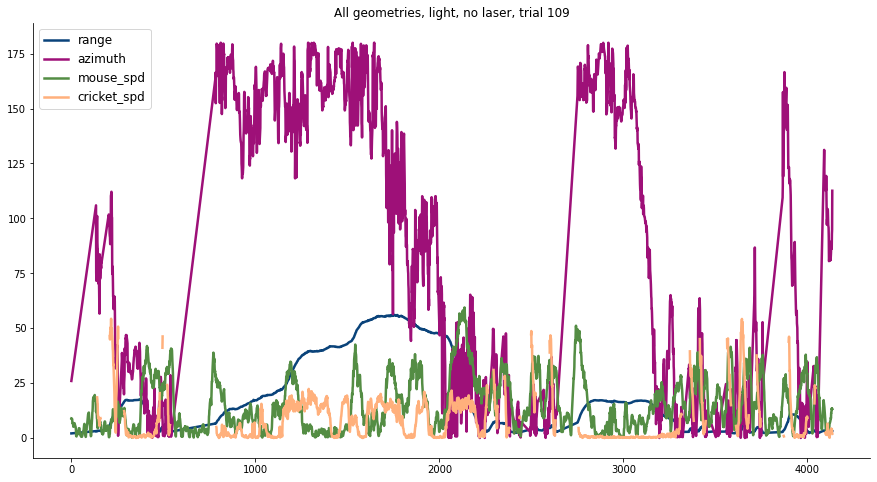

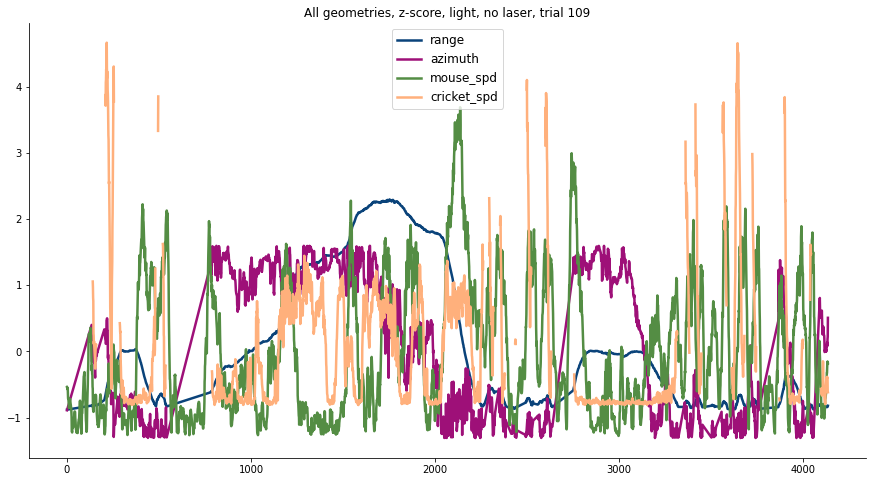

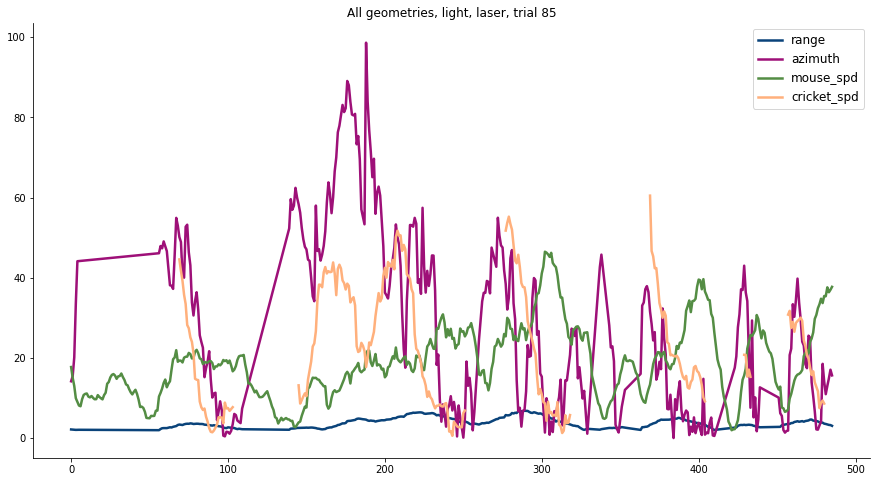

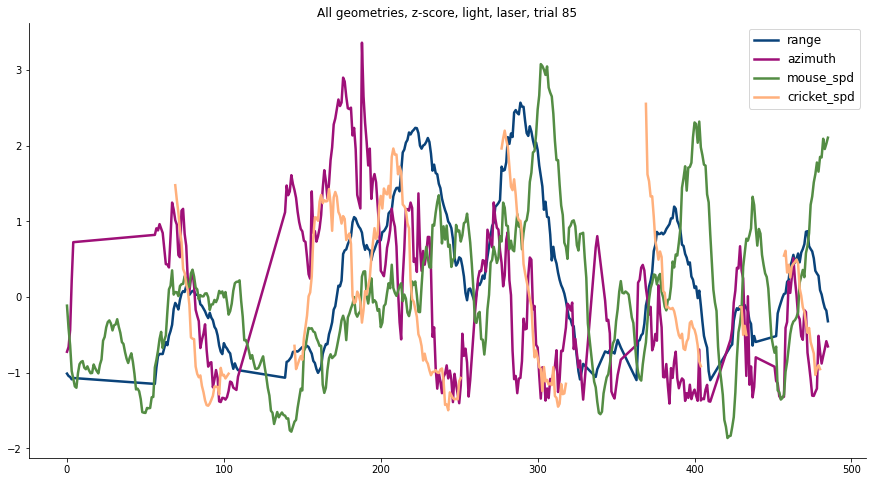

In [78]:
# indices=np.asarray(cond1_nolaser.index)
indices=[109]
for i in indices:
    drop=int(np.asarray([cond1_nolaser['cricketdrop'][i]])[0])
    intercept=int(np.asarray([cond1_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_nolaser['captureframe'][i]])[0])
   
    dist=cond1_nolaser['dist'][i]
    clip_dist=dist[intercept:capture]
    clip_dist=clip_dist.astype(float)
    z_clip_dist=stats.zscore(clip_dist, nan_policy='omit')
    
    az=cond1_nolaser['az'][i]
    clip_az=az[intercept:capture]
    clip_az=clip_az.astype(float)
    z_clip_az=stats.zscore(clip_az, nan_policy='omit')
    
    spd=cond1_nolaser['mouse_spd'][i]
    clip_spd=spd[intercept:capture]
    clip_spd=clip_spd.astype(float)
    z_clip_spd=stats.zscore(clip_spd, nan_policy='omit')
    
    cricket=cond1_nolaser['cricket_spd'][i]
    clip_cricket=cricket[intercept:capture]
    clip_cricket=clip_cricket.astype(float)
    z_clip_cricket=stats.zscore(clip_cricket, nan_policy='omit')
    
    labels=['range','azimuth', 'mouse_spd', 'cricket_spd']
    plt.figure(figsize=(15,8))

    plt.plot(clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    sns.despine()
    plt.title('All geometries, light, no laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/light_nl_trial{}.pdf'.format(i))
    plt.figure(figsize=(15,8))

    plt.plot(z_clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(z_clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(z_clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(z_clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    # plt.ylim(-3,7)
    # plt.yticks(np.arange(-3,8,1))
    sns.despine()
    
    plt.title('All geometries, z-score, light, no laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/zscore_light_nl_trial{}.pdf'.format(i))

# indices=np.asarray(cond1_laser.index)
indices=[85]
for i in indices:
    drop=int(np.asarray([cond1_laser['cricketdrop'][i]])[0])
    intercept=int(np.asarray([cond1_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_laser['captureframe'][i]])[0])
   
    dist=cond1_laser['dist'][i]
    clip_dist=dist[intercept:capture]
    clip_dist=clip_dist.astype(float)
    z_clip_dist=stats.zscore(clip_dist, nan_policy='omit')
    
    az=cond1_laser['az'][i]
    clip_az=az[intercept:capture]
    clip_az=clip_az.astype(float)
    z_clip_az=stats.zscore(clip_az, nan_policy='omit')
    
    spd=cond1_laser['mouse_spd'][i]
    clip_spd=spd[intercept:capture]
    clip_spd=clip_spd.astype(float)
    z_clip_spd=stats.zscore(clip_spd, nan_policy='omit')
    
    cricket=cond1_laser['cricket_spd'][i]
    clip_cricket=cricket[intercept:capture]
    clip_cricket=clip_cricket.astype(float)
    z_clip_cricket=stats.zscore(clip_cricket, nan_policy='omit')
    
    labels=['range','azimuth', 'mouse_spd', 'cricket_spd']
    plt.figure(figsize=(15,8))

    plt.plot(clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    sns.despine()

    plt.title('All geometries, light, laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/light_l_trial{}.pdf'.format(i))
    
    plt.figure(figsize=(15,8))

    plt.plot(z_clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(z_clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(z_clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(z_clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    # plt.ylim(-3,7)
    # plt.yticks(np.arange(-3,8,1))
    sns.despine()
    
    plt.title('All geometries, z-score, light, laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/zscore_light_l_trial{}.pdf'.format(i))
    

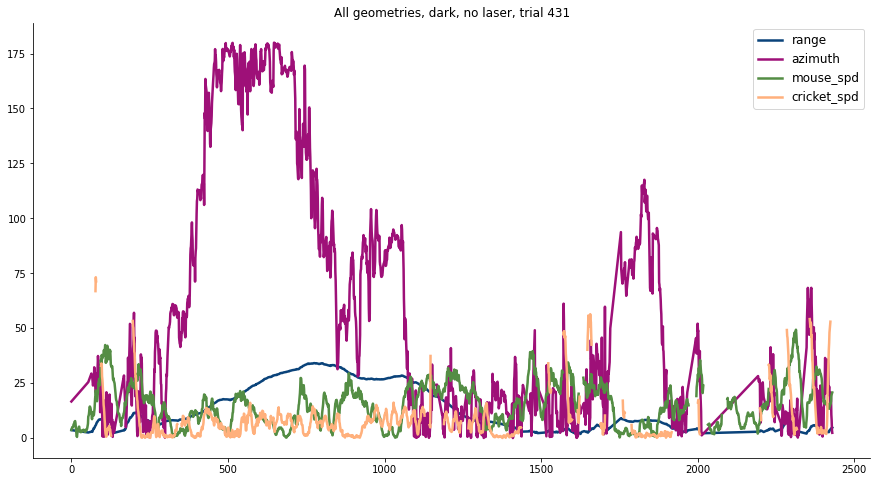

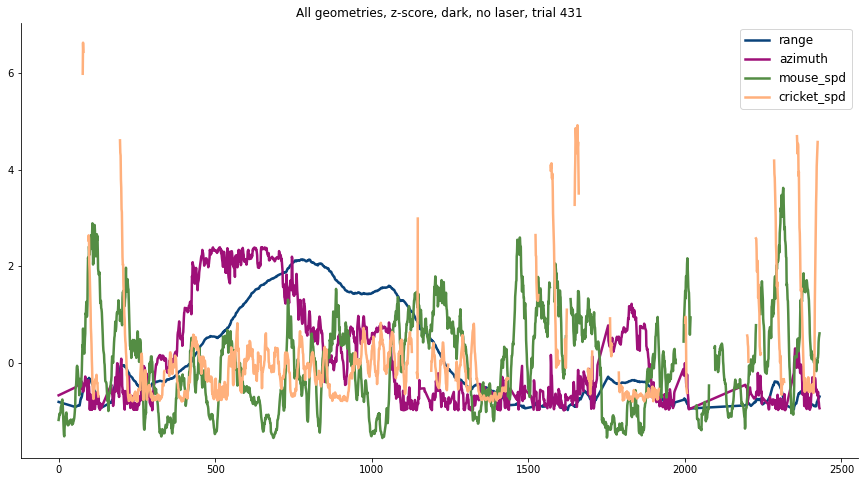

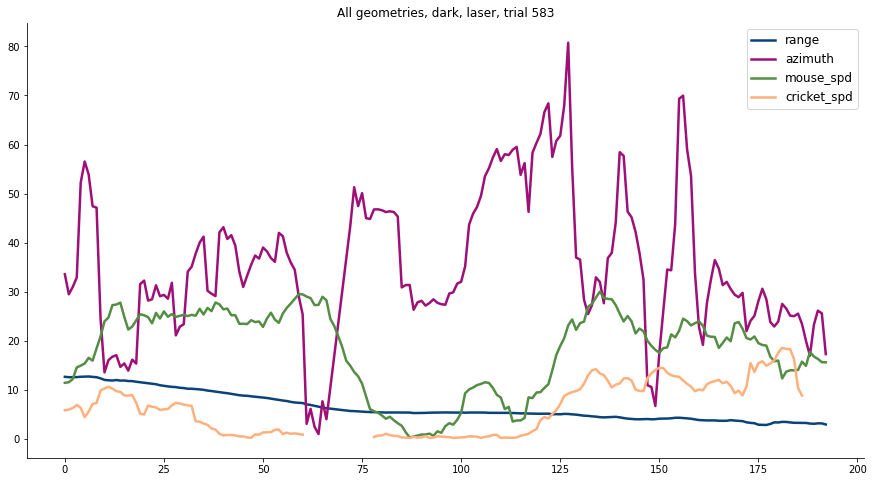

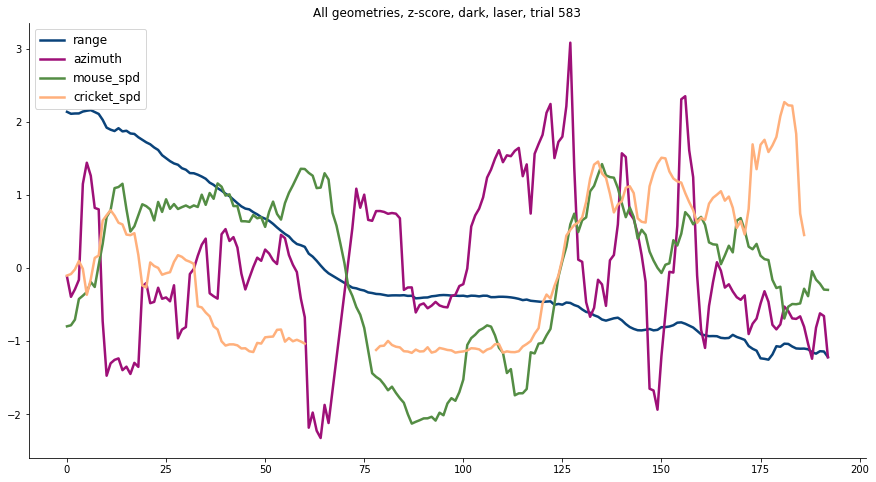

In [79]:
# indices=np.asarray(cond2_nolaser.index)
indices=[431]
for i in indices:
    drop=int(np.asarray([cond2_nolaser['cricketdrop'][i]])[0])
    intercept=int(np.asarray([cond2_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_nolaser['captureframe'][i]])[0])
   
    dist=cond2_nolaser['dist'][i]
    clip_dist=dist[intercept:capture]
    clip_dist=clip_dist.astype(float)
    z_clip_dist=stats.zscore(clip_dist, nan_policy='omit')
    
    az=cond2_nolaser['az'][i]
    clip_az=az[intercept:capture]
    clip_az=clip_az.astype(float)
    z_clip_az=stats.zscore(clip_az, nan_policy='omit')
    
    spd=cond2_nolaser['mouse_spd'][i]
    clip_spd=spd[intercept:capture]
    clip_spd=clip_spd.astype(float)
    z_clip_spd=stats.zscore(clip_spd, nan_policy='omit')
    
    cricket=cond2_nolaser['cricket_spd'][i]
    clip_cricket=cricket[intercept:capture]
    clip_cricket=clip_cricket.astype(float)
    z_clip_cricket=stats.zscore(clip_cricket, nan_policy='omit')
    
    labels=['range','azimuth', 'mouse_spd', 'cricket_spd']
    plt.figure(figsize=(15,8))

    plt.plot(clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    sns.despine()

    plt.title('All geometries, dark, no laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/dark_nl_trial{}.pdf'.format(i))
    
    plt.figure(figsize=(15,8))

    plt.plot(z_clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(z_clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(z_clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(z_clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    # plt.ylim(-3,7)
    # plt.yticks(np.arange(-3,8,1))
    sns.despine()
    
    plt.title('All geometries, z-score, dark, no laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/zscore_dark_nl_trial{}.pdf'.format(i))

# indices=np.asarray(cond2_laser.index)
indices=[583]
for i in indices:
    drop=int(np.asarray([cond2_laser['cricketdrop'][i]])[0])
    intercept=int(np.asarray([cond2_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_laser['captureframe'][i]])[0])
   
    dist=cond2_laser['dist'][i]
    clip_dist=dist[intercept:capture]
    clip_dist=clip_dist.astype(float)
    z_clip_dist=stats.zscore(clip_dist, nan_policy='omit')
    
    az=cond2_laser['az'][i]
    clip_az=az[intercept:capture]
    clip_az=clip_az.astype(float)
    z_clip_az=stats.zscore(clip_az, nan_policy='omit')
    
    spd=cond2_laser['mouse_spd'][i]
    clip_spd=spd[intercept:capture]
    clip_spd=clip_spd.astype(float)
    z_clip_spd=stats.zscore(clip_spd, nan_policy='omit')
    
    cricket=cond2_laser['cricket_spd'][i]
    clip_cricket=cricket[intercept:capture]
    clip_cricket=clip_cricket.astype(float)
    z_clip_cricket=stats.zscore(clip_cricket, nan_policy='omit')
    
    labels=['range','azimuth', 'mouse_spd', 'cricket_spd']
    plt.figure(figsize=(15,8))

    plt.plot(clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    sns.despine()

    plt.title('All geometries, dark, laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/dark_l_trial{}.pdf'.format(i))    
    plt.figure(figsize=(15,8))

    plt.plot(z_clip_dist, color='#0a437a', linestyle='-', lw=2.5)
    plt.plot(z_clip_az, color='#9e1078', linestyle='-', lw=2.5)
    plt.plot(z_clip_spd, color='#548d44',linestyle='-', lw=2.5)
    plt.plot(z_clip_cricket, color='#ffb07c', linestyle='-', lw=2.5)

    plt.legend(labels=labels, fontsize='large')
    # plt.ylim(-3,7)
    # plt.yticks(np.arange(-3,8,1))
    sns.despine()
    
    plt.title('All geometries, z-score, dark, laser, trial {}'.format(i))
    plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/trial_geometryplots/zscore_dark_l_trial{}.pdf'.format(i))

In [49]:
clip_dist
clip_dist=clip_dist.astype(float)
clip_dist
# stats.zscore(clip_dist)

array([ 2.14068221,  2.11399233,  2.11806213,  2.11875158,  2.14455229,
        2.15571712,  2.16366032,  2.13851515,  2.11191206,  2.0314185 ,
        1.92403223,  1.89651752,  1.87786464,  1.91650122,  1.87275953,
        1.88148351,  1.8444193 ,  1.83805954,  1.79292128,  1.7582479 ,
        1.72307225,  1.69633644,  1.65242168,  1.61861024,  1.54683285,
        1.50588606,  1.4654473 ,  1.43402989,  1.41618725,  1.36871787,
        1.34800666,  1.30200461,  1.29961578,  1.27985025,  1.2543336 ,
        1.22440453,  1.17131003,  1.14085987,  1.09580047,  1.06196686,
        1.01999198,  0.98611267,  0.93868075,  0.89067565,  0.84622081,
        0.81604047,  0.80499542,  0.76697379,  0.73710732,  0.70015202,
        0.67735025,  0.64898731,  0.60689234,  0.55756711,  0.51228055,
        0.46954314,  0.43513559,  0.3737329 ,  0.33104462,  0.31449876,
        0.29205079,  0.19882038,  0.15813676,  0.10081804,  0.03663668,
       -0.0231872 , -0.07017867, -0.10289536, -0.13561206, -0.16

In [109]:
cond1_nl_ranges=pd.DataFrame()
indices=np.asarray(cond1_nolaser.index)
# indices=indices[0:100]
for i in indices:
    dist=cond1_nolaser['dist'][i]
    
    intercept=int(np.asarray([cond1_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_nolaser['captureframe'][i]])[0])
    clip_dist=dist[intercept:capture]
    new_row=pd.DataFrame(clip_dist)
    cond1_nl_ranges=pd.concat([cond1_nl_ranges,new_row.T],ignore_index=True)
# cond1_l_ranges
mean_cond1nl=cond1_nl_ranges.mean()
sem_cond1nl=cond1_nl_ranges.sem()
print(mean_cond1nl)

cond1_l_ranges=pd.DataFrame()
indices=np.asarray(cond1_laser.index)
# indices=indices[0:100]
for i in indices:
    dist=cond1_laser['dist'][i]
    intercept=int(np.asarray([cond1_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_laser['captureframe'][i]])[0])
    clip_dist=dist[intercept:capture]
    new_row=pd.DataFrame(clip_dist)
    cond1_l_ranges=pd.concat([cond1_l_ranges,new_row.T],ignore_index=True)
# cond1_nl_ranges
mean_cond1l=cond1_l_ranges.mean()
sem_cond1l=cond1_l_ranges.sem()
print(mean_cond1l)

0         4.115398
1         4.173535
2         4.408236
3         4.730004
4         4.771915
           ...    
60842    44.220616
60843    44.225123
60844    44.225618
60845    44.192372
60846    44.215751
Length: 60847, dtype: float64
0         3.736852
1         4.529293
2         4.717979
3         4.769438
4         5.015880
           ...    
70595    50.185156
70596    50.194046
70597    50.206307
70598    50.232127
70599    50.237763
Length: 70600, dtype: float64


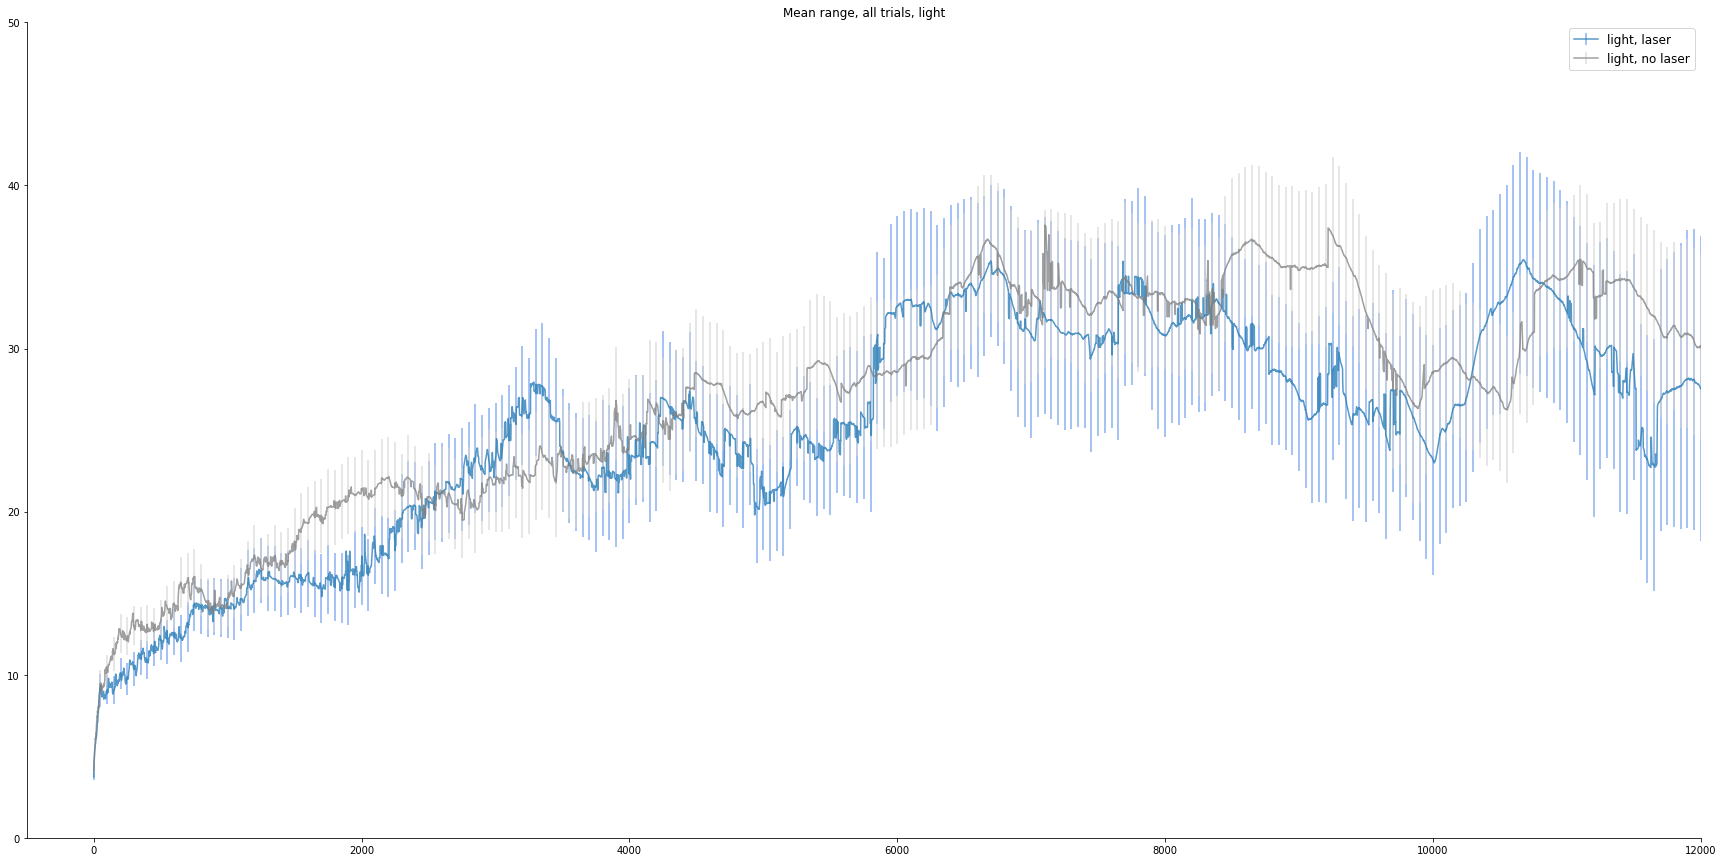

In [123]:
plt.figure(figsize=(30,15))
labels=['light, laser', 'light, no laser']
plt.errorbar(np.arange(0,len(mean_cond1l)), mean_cond1l, yerr=sem_cond1l,errorevery=50, ecolor='cornflowerblue', alpha=0.75)
plt.xlim(-500,12000)
plt.ylim(0,50)
# plt.fill_between(
plt.errorbar(np.arange(0,len(mean_cond1nl)), mean_cond1nl, yerr=sem_cond1nl,errorevery=50, color='grey', ecolor='lightgrey', alpha=0.75)
sns.despine()
plt.legend(labels=labels, fontsize='large')
plt.xlim(-500,12000)
plt.ylim(0,50)        
# plt.xlim(20000,30000)
plt.title('Mean range, all trials, light')
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/meanrange_light_1min.pdf')

In [116]:
cond1_nl_az=pd.DataFrame()
indices=np.asarray(cond1_nolaser.index)
# indices=indices[0:100]
for i in indices:
    az=cond1_nolaser['az'][i]
    
    intercept=int(np.asarray([cond1_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_nolaser['captureframe'][i]])[0])
    clip_az=az[intercept:capture]
    new_row=pd.DataFrame(clip_az)
    cond1_nl_az=pd.concat([cond1_nl_az,new_row.T],ignore_index=True)
# cond1_l_ranges
meanaz_cond1nl=cond1_nl_az.mean()
semaz_cond1nl=cond1_nl_az.sem()
print(meanaz_cond1nl)

cond1_l_az=pd.DataFrame()
indices=np.asarray(cond1_laser.index)
# indices=indices[0:100]
for i in indices:
    az=cond1_laser['az'][i]
    intercept=int(np.asarray([cond1_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_laser['captureframe'][i]])[0])
    clip_az=az[intercept:capture]
    new_row=pd.DataFrame(clip_az)
    cond1_l_az=pd.concat([cond1_l_az,new_row.T],ignore_index=True)
# cond1_nl_ranges
meanaz_cond1l=cond1_l_az.mean()
semaz_cond1l=cond1_l_az.sem()
print(meanaz_cond1l)



0        22.217053
1        24.261265
2        26.269289
3        27.459619
4        29.874414
           ...    
60842    89.789751
60843    89.662718
60844    90.795745
60845    90.547261
60846    89.925105
Length: 60847, dtype: float64
0        21.037260
1        26.410640
2        27.406940
3        29.469104
4        30.335657
           ...    
70595     9.403041
70596     9.997657
70597    11.132731
70598    12.150312
70599    12.127303
Length: 70600, dtype: float64


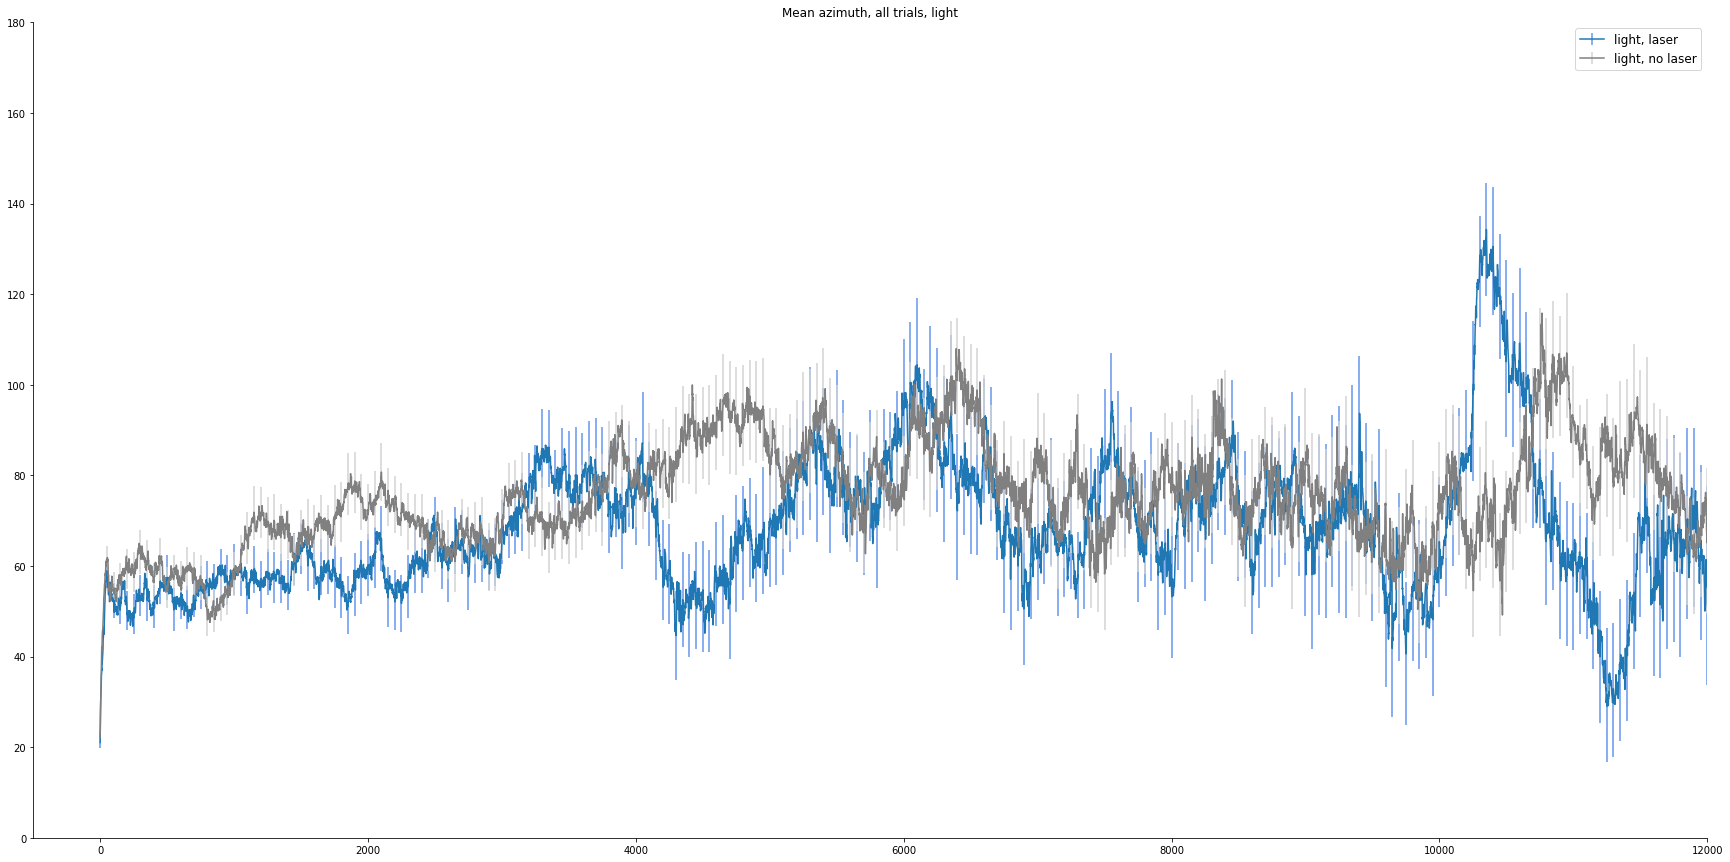

In [125]:
plt.figure(figsize=(30,15))
labels=['light, laser', 'light, no laser']
plt.errorbar(np.arange(0,len(meanaz_cond1l)), meanaz_cond1l, yerr=semaz_cond1l,errorevery=50, ecolor='cornflowerblue')
plt.xlim(-500,12000)
plt.ylim(0,180)
# plt.fill_between(
plt.errorbar(np.arange(0,len(meanaz_cond1nl)), meanaz_cond1nl, yerr=semaz_cond1nl,errorevery=50, color='grey', ecolor='lightgrey')
plt.xlim(-500,12000)
plt.ylim(0,180)
sns.despine()
plt.legend(labels=labels, fontsize='large')
# plt.xlim(20000,30000)
plt.title('Mean azimuth, all trials, light')
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/meanaz_light_1min.pdf')

In [51]:
cond1_nl_spd=pd.DataFrame()
indices=np.asarray(cond1_nolaser.index)
# indices=indices[0:100]
for i in indices:
    spd=cond1_nolaser['mouse_spd'][i]
    
    intercept=int(np.asarray([cond1_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_nolaser['captureframe'][i]])[0])
    clip_spd=spd[intercept:capture]
    new_row=pd.DataFrame(clip_spd)
    cond1_nl_spd=pd.concat([cond1_nl_spd,new_row.T],ignore_index=True)
# cond1_l_ranges
meanspd_cond1nl=cond1_nl_spd.mean()
semspd_cond1nl=cond1_nl_spd.sem()
print(meanspd_cond1nl)

cond1_l_spd=pd.DataFrame()
indices=np.asarray(cond1_laser.index)
# indices=indices[0:100]
for i in indices:
    spd=cond1_laser['mouse_spd'][i]
    intercept=int(np.asarray([cond1_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond1_laser['captureframe'][i]])[0])
    clip_spd=spd[intercept:capture]
    new_row=pd.DataFrame(clip_spd)
    cond1_l_spd=pd.concat([cond1_l_spd,new_row.T],ignore_index=True)
# cond1_nl_ranges
meanspd_cond1l=cond1_l_spd.mean()
semspd_cond1l=cond1_l_spd.sem()
print(meanspd_cond1l)



0        20.704581
1        20.555936
2        20.315173
3        20.148913
4        20.021070
           ...    
60842     4.068544
60843     3.452238
60844     3.379930
60845     2.785625
60846     2.431433
Length: 60847, dtype: float64
0        19.358402
1        19.122991
2        18.833536
3        18.621548
4        18.145673
           ...    
70595     1.913232
70596     1.783290
70597     1.496014
70598     1.305203
70599     1.078839
Length: 70600, dtype: float64


In [120]:
plt.figure(figsize=(30,15))
labels=['light, laser', 'light, no laser']
plt.errorbar(np.arange(0,len(meanspd_cond1l)), meanspd_cond1l, yerr=semspd_cond1l,errorevery=200, ecolor='cornflowerblue')
# plt.fill_between(
plt.errorbar(np.arange(0,len(meanspd_cond1nl)), meanspd_cond1nl, yerr=semspd_cond1nl,errorevery=200,color='grey', ecolor='lightgrey')
sns.despine()
plt.legend(labels=labels, fontsize='large')
# plt.xlim(20000,30000)
plt.title('Mean mouse speed, all trials, light')
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/meanspd_light_1min.pdf')

NameError: name 'meanspd_cond1l' is not defined

<Figure size 2160x1080 with 0 Axes>

In [119]:
cond2_nl_ranges=pd.DataFrame()
indices=np.asarray(cond2_nolaser.index)
# indices=indices[0:100]
for i in indices:
    dist=cond2_nolaser['dist'][i]
    
    intercept=int(np.asarray([cond2_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_nolaser['captureframe'][i]])[0])
    clip_dist=dist[intercept:capture]
    new_row=pd.DataFrame(clip_dist)
    cond2_nl_ranges=pd.concat([cond2_nl_ranges,new_row.T],ignore_index=True)
# cond1_l_ranges
mean_cond2nl=cond2_nl_ranges.mean()
sem_cond2nl=cond2_nl_ranges.sem()
print(mean_cond2nl)

cond2_l_ranges=pd.DataFrame()
indices=np.asarray(cond2_laser.index)
# indices=indices[0:100]
for i in indices:
    dist=cond2_laser['dist'][i]
    intercept=int(np.asarray([cond2_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_laser['captureframe'][i]])[0])
    clip_dist=dist[intercept:capture]
    new_row=pd.DataFrame(clip_dist)
    cond2_l_ranges=pd.concat([cond2_l_ranges,new_row.T],ignore_index=True)
# cond1_nl_ranges
mean_cond2l=cond2_l_ranges.mean()
sem_cond2l=cond2_l_ranges.sem()
print(mean_cond2l)

cond2_nl_az=pd.DataFrame()
indices=np.asarray(cond2_nolaser.index)
# indices=indices[0:100]
for i in indices:
    az=cond2_nolaser['az'][i]
    
    intercept=int(np.asarray([cond2_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_nolaser['captureframe'][i]])[0])
    clip_az=az[intercept:capture]
    new_row=pd.DataFrame(clip_az)
    cond2_nl_az=pd.concat([cond2_nl_az,new_row.T],ignore_index=True)
# cond1_l_ranges
meanaz_cond2nl=cond2_nl_az.mean()
semaz_cond2nl=cond2_nl_az.sem()
print(meanaz_cond1nl)

cond2_l_az=pd.DataFrame()
indices=np.asarray(cond2_laser.index)
# indices=indices[0:100]
for i in indices:
    az=cond2_laser['az'][i]
    intercept=int(np.asarray([cond2_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_laser['captureframe'][i]])[0])
    clip_az=az[intercept:capture]
    new_row=pd.DataFrame(clip_az)
    cond2_l_az=pd.concat([cond2_l_az,new_row.T],ignore_index=True)
# cond1_nl_ranges
meanaz_cond2l=cond2_l_az.mean()
semaz_cond2l=cond2_l_az.sem()
print(meanaz_cond2l)

cond2_nl_spd=pd.DataFrame()
indices=np.asarray(cond2_nolaser.index)
# indices=indices[0:100]
for i in indices:
    spd=cond2_nolaser['mouse_spd'][i]
    
    intercept=int(np.asarray([cond2_nolaser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_nolaser['captureframe'][i]])[0])
    clip_spd=spd[intercept:capture]
    new_row=pd.DataFrame(clip_spd)
    cond2_nl_spd=pd.concat([cond2_nl_spd,new_row.T],ignore_index=True)
# cond1_l_ranges
meanspd_cond2nl=cond2_nl_spd.mean()
semspd_cond2nl=cond2_nl_spd.sem()
print(meanspd_cond2nl)

cond2_l_spd=pd.DataFrame()
indices=np.asarray(cond2_laser.index)
# indices=indices[0:100]
for i in indices:
    spd=cond2_laser['mouse_spd'][i]
    intercept=int(np.asarray([cond2_laser['absoluteintercept'][i]])[0])
    capture=int(np.asarray([cond2_laser['captureframe'][i]])[0])
    clip_spd=spd[intercept:capture]
    new_row=pd.DataFrame(clip_spd)
    cond2_l_spd=pd.concat([cond2_l_spd,new_row.T],ignore_index=True)
# cond1_nl_ranges
meanspd_cond2l=cond2_l_spd.mean()
semspd_cond2l=cond2_l_spd.sem()
print(meanspd_cond2l)

0        4.630463
1        4.624058
2        4.701026
3        4.768418
4        4.784694
           ...   
21871    2.719527
21872    2.705728
21873    2.657377
21874    2.932031
21875    2.892093
Length: 21876, dtype: float64
0        5.511327
1        5.488702
2        5.486338
3        5.366057
4        5.380305
           ...   
22919    2.913935
22920    3.027916
22921    2.865724
22922    2.794775
22923    2.754636
Length: 22924, dtype: float64
0        22.217053
1        24.261265
2        26.269289
3        27.459619
4        29.874414
           ...    
60842    89.789751
60843    89.662718
60844    90.795745
60845    90.547261
60846    89.925105
Length: 60847, dtype: float64
0        22.822660
1        24.398999
2        25.399955
3        25.930891
4        25.904016
           ...    
22919    28.696376
22920     8.993329
22921     1.835043
22922     3.317479
22923     2.590024
Length: 22924, dtype: float64
0        17.094060
1        16.847892
2        16.403067
3        

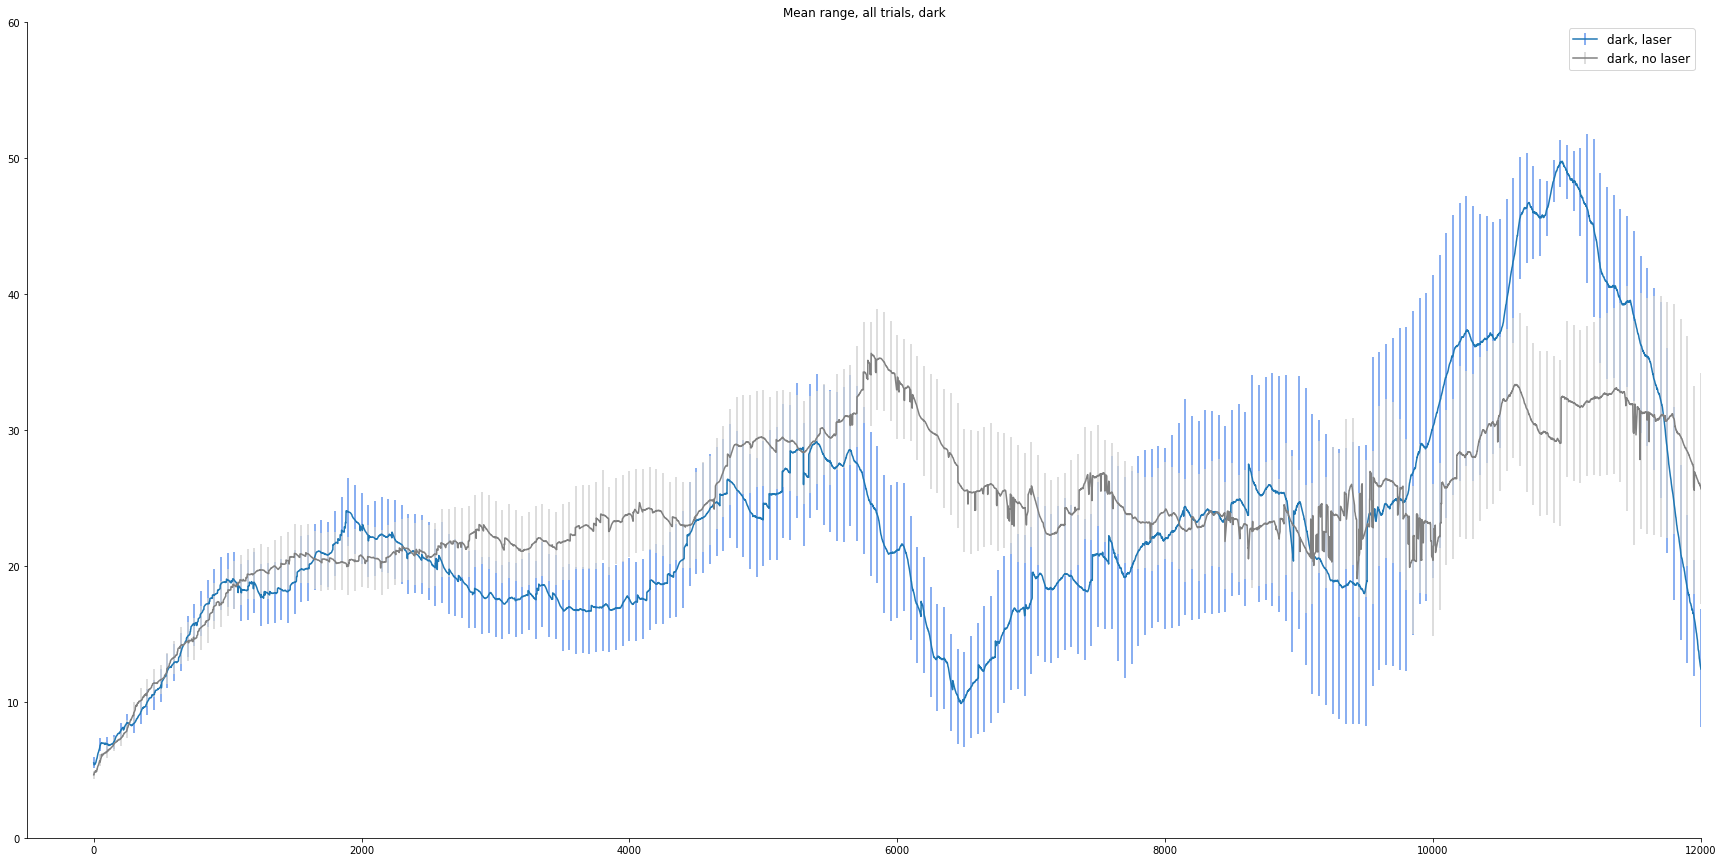

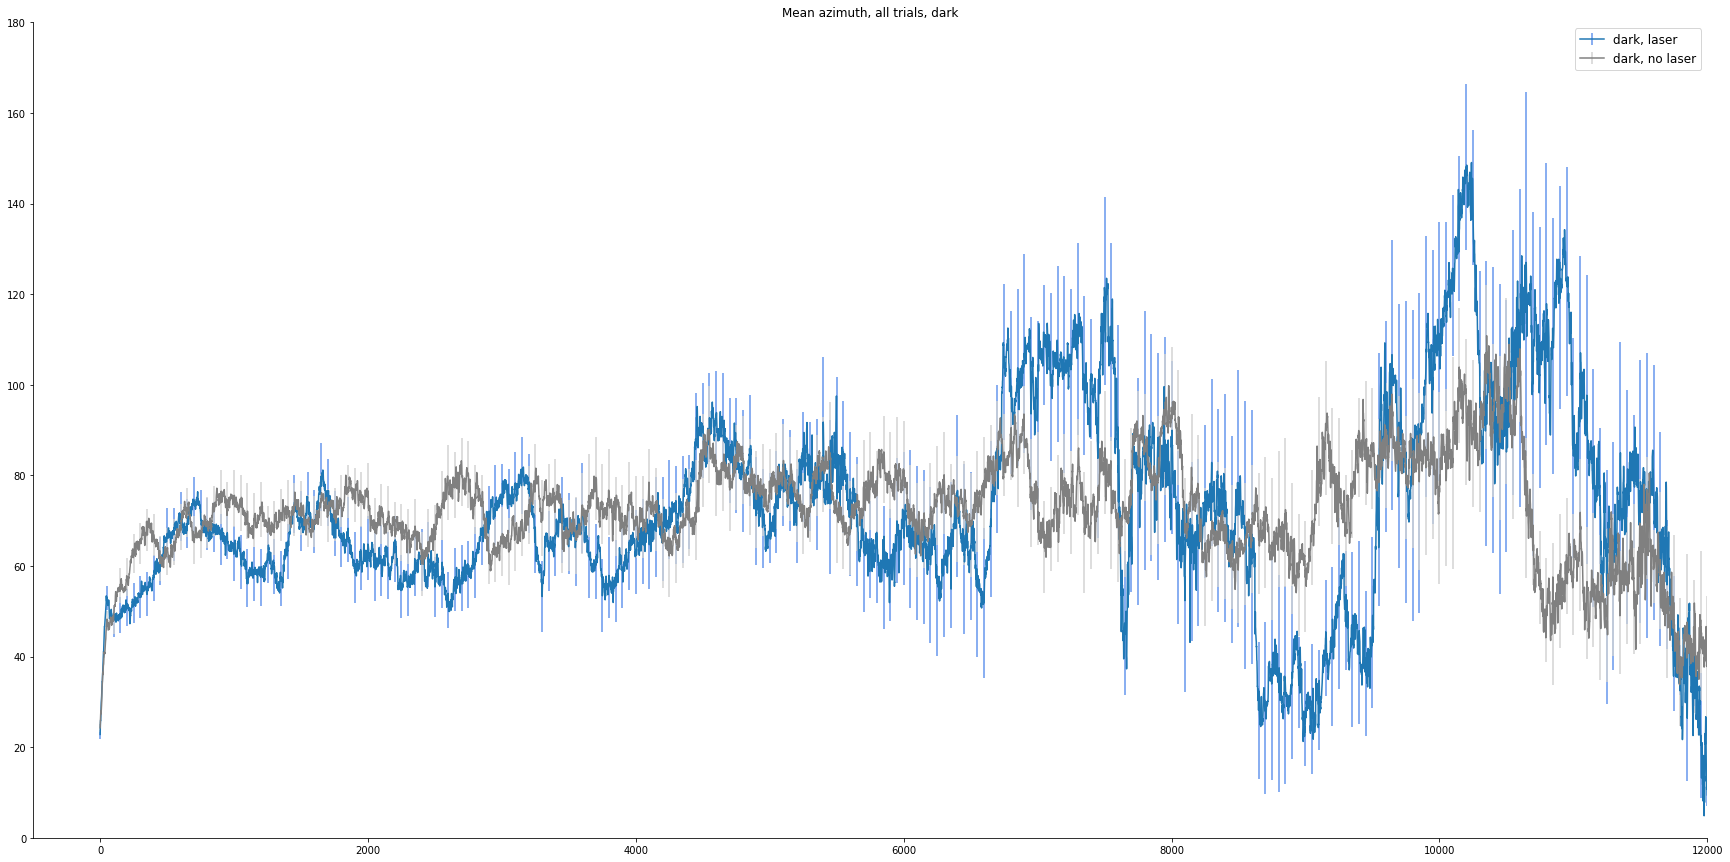

In [126]:
plt.figure(figsize=(30,15))
labels=['dark, laser', 'dark, no laser']
plt.errorbar(np.arange(0,len(mean_cond2l)), mean_cond2l, yerr=sem_cond2l,errorevery=50, ecolor='cornflowerblue')
plt.xlim(-500,12000)
plt.ylim(0,60)
plt.errorbar(np.arange(0,len(mean_cond2nl)), mean_cond2nl, yerr=sem_cond2nl,errorevery=50, color='grey', ecolor='lightgrey')
plt.xlim(-500,12000)
plt.ylim(0,60)
sns.despine()
plt.legend(labels=labels, fontsize='large')
# plt.xlim(20000,30000)
plt.title('Mean range, all trials, dark')
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/meanrange_dark_1min.pdf')

plt.figure(figsize=(30,15))
labels=['dark, laser', 'dark, no laser']
plt.errorbar(np.arange(0,len(meanaz_cond2l)), meanaz_cond2l, yerr=semaz_cond2l,errorevery=50, ecolor='cornflowerblue')
plt.xlim(-500,12000)
plt.ylim(0,180)
plt.errorbar(np.arange(0,len(meanaz_cond2nl)), meanaz_cond2nl, yerr=semaz_cond2nl,errorevery=50, color='grey', ecolor='lightgrey')
plt.xlim(-500,12000)
plt.ylim(0,180)
sns.despine()
plt.legend(labels=labels, fontsize='large')
# plt.xlim(20000,30000)
plt.title('Mean azimuth, all trials, dark')
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/meanaz_dark_1min.pdf')

# plt.figure(figsize=(30,15))
# labels=['dark, laser', 'dark, no laser']
# plt.errorbar(np.arange(0,len(meanspd_cond2l)), meanspd_cond2l, yerr=semspd_cond2l,errorevery=200, ecolor='cornflowerblue')
# # plt.fill_between(
# plt.errorbar(np.arange(0,len(meanspd_cond2nl)), meanspd_cond2nl, yerr=semspd_cond2nl,errorevery=200, color='grey', ecolor='lightgrey')
# sns.despine()
# plt.legend(labels=labels, fontsize='large')
# # plt.xlim(20000,30000)
# plt.title('Mean mouse speed, all trials, dark')
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/meanspd_dark.pdf')

In [342]:
cond1_l_ranges.T.mean(axis=1)

0         3.736852
1         4.529293
2         4.717979
3         4.769438
4         5.015880
           ...    
70595    50.185156
70596    50.194046
70597    50.206307
70598    50.232127
70599    50.237763
Length: 70600, dtype: float64

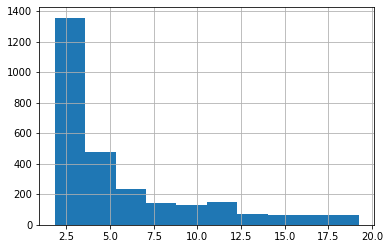

In [57]:
test=cond1_l_ranges[0:4]
test=test.T
test[0].astype(float)
test[1].astype(float)
test[2].astype(float)
test[3].astype(float)
hist=test[0].hist(bins=10)
# test_hist=np.histogram(test[0])


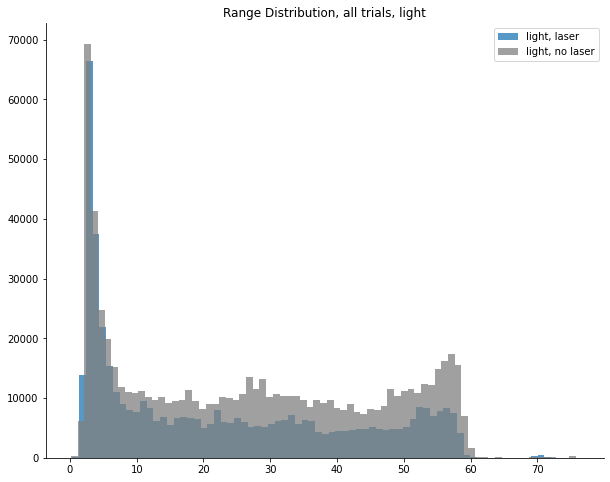

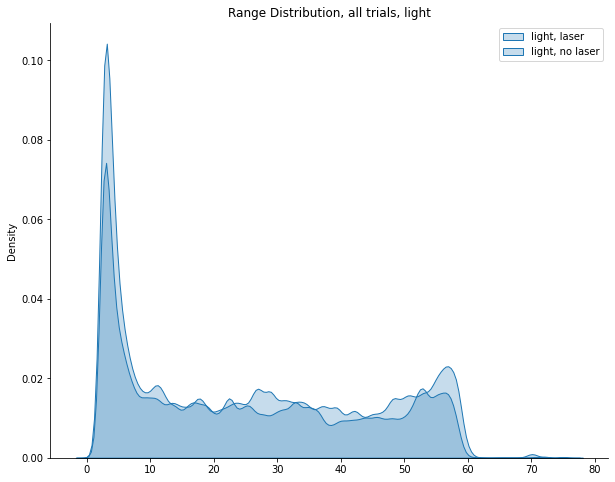

In [137]:
fig, ax=plt.subplots(figsize=(10,8))
labels=['light, laser', 'light, no laser']

test_flat=cdc(cond1_l_ranges)
test_flat=test_flat.to_numpy().flatten()
test_flat=pd.DataFrame(test_flat)
test_flat=test_flat.astype(float)

test_flat1=cdc(cond1_nl_ranges)
test_flat1=test_flat1.to_numpy().flatten()
test_flat1=pd.DataFrame(test_flat1)
test_flat1=test_flat1.astype(float)

hist=test_flat.hist(bins=75, grid=False, ax=ax, alpha=0.75)
hist=test_flat1.hist(bins=75, grid=False, color='grey', ax=ax, alpha=0.75)
plt.title('Range Distribution, all trials, light')
plt.legend(labels=labels)
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/rangehist_light.pdf')

fig2=plt.figure(figsize=(10,8))
sns.kdeplot(data=test_flat, fill=True, bw_adjust=0.5)
sns.kdeplot(data=test_flat1, fill=True,bw_adjust=0.5)
plt.legend(labels=labels)
plt.title('Range Distribution, all trials, light')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/rangekde_light.pdf')

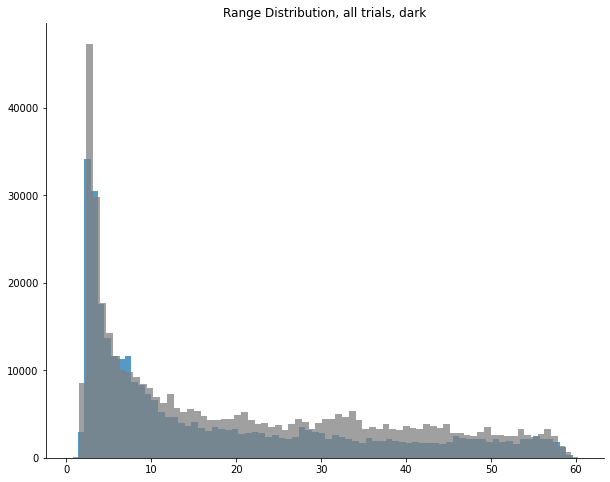

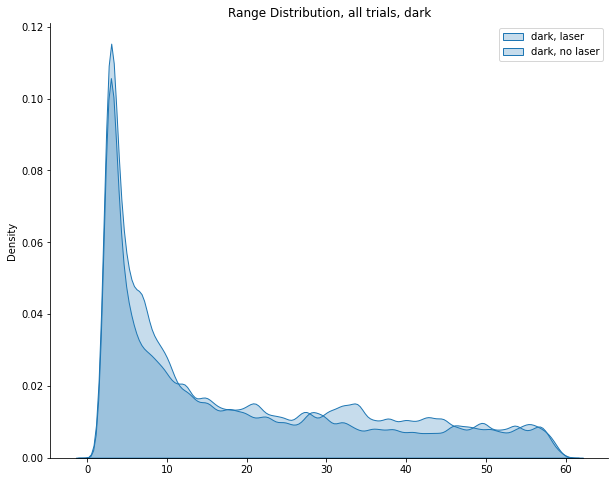

In [142]:
fig, ax=plt.subplots(figsize=(10,8))
labels=['dark, laser', 'dark, no laser']

test_flat2=cdc(cond2_l_ranges)
test_flat2=test_flat2.to_numpy().flatten()
test_flat2=pd.DataFrame(test_flat2)
test_flat2=test_flat2.astype(float)

test_flat3=cdc(cond2_nl_ranges)
test_flat3=test_flat3.to_numpy().flatten()
test_flat3=pd.DataFrame(test_flat3)
test_flat3=test_flat3.astype(float)

hist=test_flat2.hist(bins=75, grid=False, ax=ax, alpha=0.75)
hist=test_flat3.hist(bins=75, grid=False, color='grey', ax=ax, alpha=0.75)
plt.title('Range Distribution, all trials, dark')
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/rangehist_dark.pdf')

fig2=plt.figure(figsize=(10,8))
sns.kdeplot(data=test_flat2, fill=True, bw_adjust=0.5)
sns.kdeplot(data=test_flat3, fill=True, bw_adjust=0.5)
plt.legend(labels=labels)
plt.title('Range Distribution, all trials, dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/rangekde_dark.pdf')

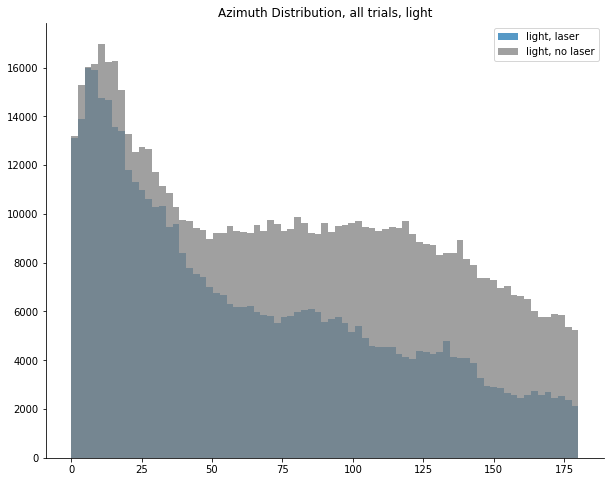

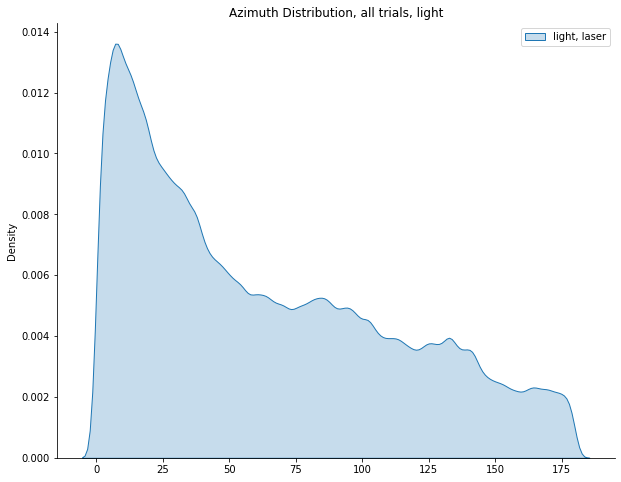

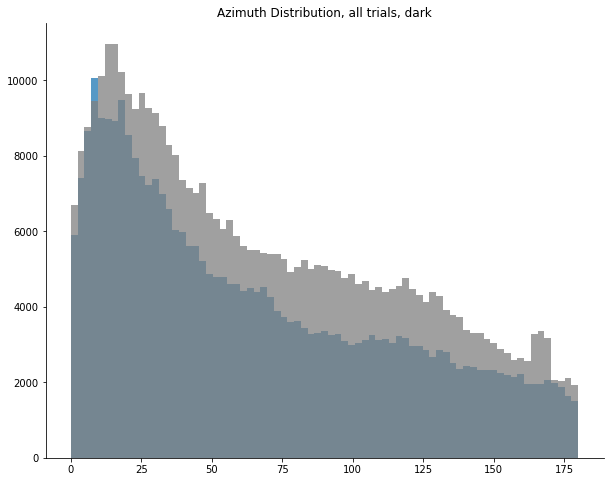

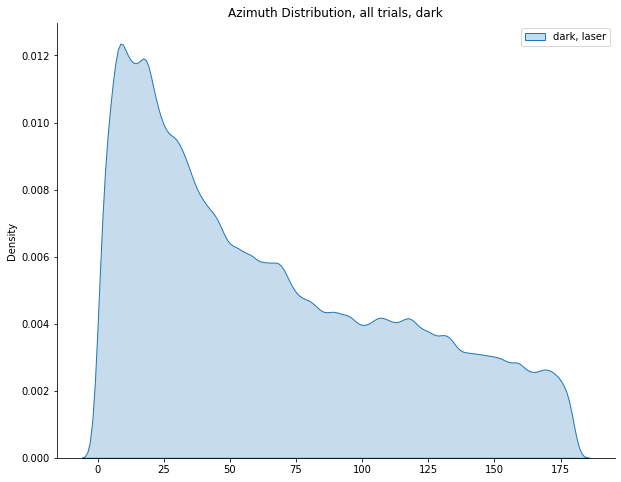

In [149]:
fig, ax=plt.subplots(figsize=(10,8))
labels=['light, laser', 'light, no laser']

test_flat=cdc(cond1_l_az)
test_flat=test_flat.to_numpy().flatten()
test_flat=pd.DataFrame(test_flat)
test_flat=test_flat.astype(float)

test_flat1=cdc(cond1_nl_az)
test_flat1=test_flat1.to_numpy().flatten()
test_flat1=pd.DataFrame(test_flat1)
test_flat1=test_flat1.astype(float)

hist=test_flat.hist(bins=75, grid=False, ax=ax, alpha=0.75)
hist=test_flat1.hist(bins=75, grid=False, color='grey', ax=ax, alpha=0.75)
plt.title('Azimuth Distribution, all trials, light')
plt.legend(labels=labels)
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/azhist_light.pdf')

fig2=plt.figure(figsize=(10,8))
sns.kdeplot(data=test_flat, fill=True, bw_adjust=0.5)
# sns.kdeplot(data=test_flat1, fill=True,bw_adjust=0.5)
plt.legend(labels=labels)
plt.title('Azimuth Distribution, all trials, light')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/azkde_light.pdf')

fig, ax=plt.subplots(figsize=(10,8))
labels=['dark, laser', 'dark, no laser']

test_flat2=cdc(cond2_l_az)
test_flat2=test_flat2.to_numpy().flatten()
test_flat2=pd.DataFrame(test_flat2)
test_flat2=test_flat2.astype(float)

test_flat3=cdc(cond2_nl_az)
test_flat3=test_flat3.to_numpy().flatten()
test_flat3=pd.DataFrame(test_flat3)
test_flat3=test_flat3.astype(float)

hist=test_flat2.hist(bins=75, grid=False, ax=ax, alpha=0.75)
hist=test_flat3.hist(bins=75, grid=False, color='grey', ax=ax, alpha=0.75)
plt.title('Azimuth Distribution, all trials, dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/rangeaz_dark.pdf')

fig2=plt.figure(figsize=(10,8))
sns.kdeplot(data=test_flat2, fill=True, bw_adjust=0.5)
# sns.kdeplot(data=test_flat3, fill=True, bw_adjust=0.5)
plt.legend(labels=labels)
plt.title('Azimuth Distribution, all trials, dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/azkde_dark.pdf')

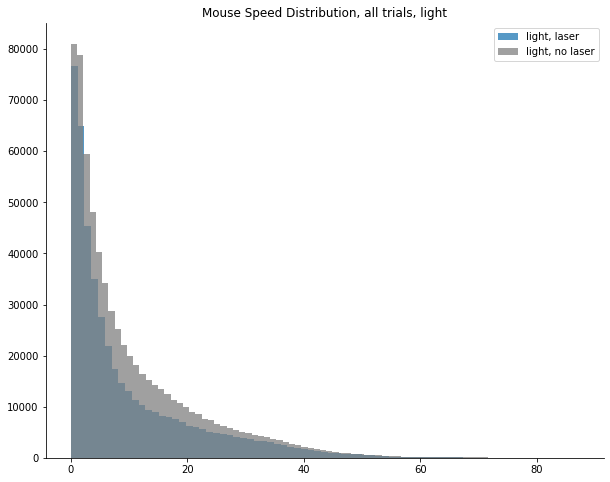

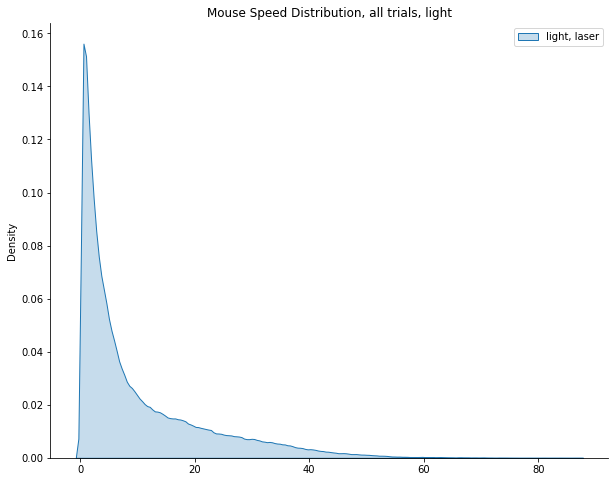

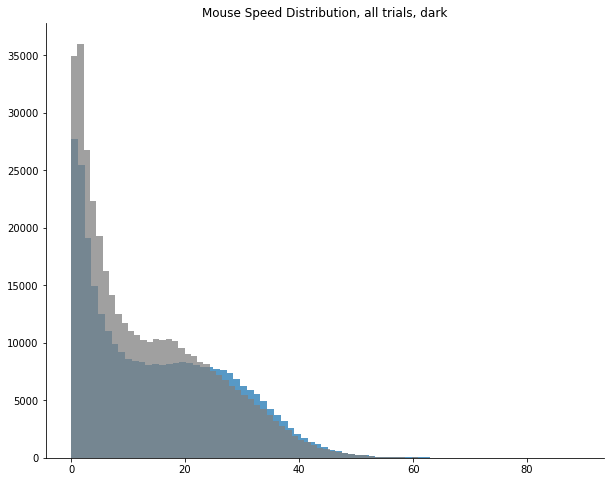

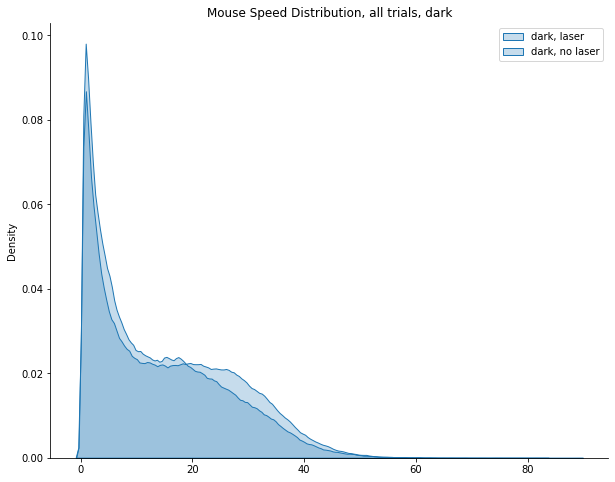

In [148]:
fig, ax=plt.subplots(figsize=(10,8))
labels=['light, laser', 'light, no laser']

test_flat=cdc(cond1_l_spd)
test_flat=test_flat.to_numpy().flatten()
test_flat=pd.DataFrame(test_flat)
test_flat=test_flat.astype(float)

test_flat1=cdc(cond1_nl_spd)
test_flat1=test_flat1.to_numpy().flatten()
test_flat1=pd.DataFrame(test_flat1)
test_flat1=test_flat1.astype(float)

hist=test_flat.hist(bins=75, grid=False, ax=ax, alpha=0.75)
hist=test_flat1.hist(bins=75, grid=False, color='grey', ax=ax, alpha=0.75)
plt.title('Mouse Speed Distribution, all trials, light')
plt.legend(labels=labels)
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/spdhist_light.pdf')

fig2=plt.figure(figsize=(10,8))
sns.kdeplot(data=test_flat, fill=True, bw_adjust=0.3)
# sns.kdeplot(data=test_flat1, fill=True,bw_adjust=0.3)
plt.legend(labels=labels)
plt.title('Mouse Speed Distribution, all trials, light')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/spdkde_light.pdf')

fig, ax=plt.subplots(figsize=(10,8))
labels=['dark, laser', 'dark, no laser']

test_flat2=cdc(cond2_l_spd)
test_flat2=test_flat2.to_numpy().flatten()
test_flat2=pd.DataFrame(test_flat2)
test_flat2=test_flat2.astype(float)

test_flat3=cdc(cond2_nl_spd)
test_flat3=test_flat3.to_numpy().flatten()
test_flat3=pd.DataFrame(test_flat3)
test_flat3=test_flat3.astype(float)

hist=test_flat2.hist(bins=75, grid=False, ax=ax, alpha=0.75)
hist=test_flat3.hist(bins=75, grid=False, color='grey', ax=ax, alpha=0.75)
plt.title('Mouse Speed Distribution, all trials, dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/spdaz_dark.pdf')

fig2=plt.figure(figsize=(10,8))
sns.kdeplot(data=test_flat2, fill=True, bw_adjust=0.3)
sns.kdeplot(data=test_flat3, fill=True, bw_adjust=0.3)
plt.legend(labels=labels)
plt.title('Mouse Speed Distribution, all trials, dark')
sns.despine()
# plt.savefig('/Users/mollyshallow/Desktop/ZIPlots/spdkde_dark.pdf')

96.91358024691358
95.06172839506173
98.91304347826086
98.37837837837839
3.0864197530864197
4.938271604938271
1.0869565217391304
1.6216216216216217


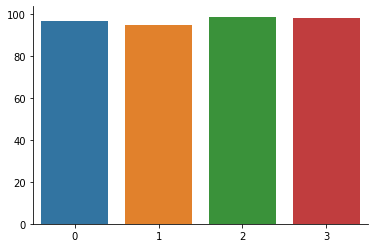

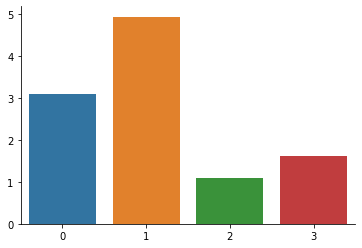

In [107]:
total_c1l=len(cond1_laser['capduration'])
# print(total_c1l)
failures_c1l=cond1_laser['capduration'].isna().sum()
# print(failures_c1l)
successes_c1l=cond1_laser['capduration'].notna().sum()
# print(successes_c1l)

total_c1nl=len(cond1_nolaser['capduration'])
# print(total_c1nl)
failures_c1nl=cond1_nolaser['capduration'].isna().sum()
# print(failures_c1nl)
successes_c1nl=cond1_nolaser['capduration'].notna().sum()
# print(successes_c1nl)

total_c2l=len(cond2_laser['capduration'])
# print(total_c2l)
failures_c2l=cond2_laser['capduration'].isna().sum()
# print(failures_c2l)
successes_c2l=cond2_laser['capduration'].notna().sum()
# print(successes_c2l)

total_c2nl=len(cond2_nolaser['capduration'])
# print(total_c2nl)
failures_c2nl=cond2_nolaser['capduration'].isna().sum()
# print(failures_c2nl)
successes_c2nl=cond2_nolaser['capduration'].notna().sum()
# print(successes_c2nl)

successrate_c1l=(successes_c1l/total_c1l)*100
successrate_c1l=np.asarray(successrate_c1l)
print(successrate_c1l)
successrate_c1nl=(successes_c1nl/total_c1nl)*100
successrate_c1nl=np.asarray(successrate_c1nl)
print(successrate_c1nl)
successrate_c2l=(successes_c2l/total_c2l)*100
successrate_c2l=np.asarray(successrate_c2l)
print(successrate_c2l)
successrate_c2nl=(successes_c2nl/total_c2nl)*100
successrate_c2nl=np.asarray(successrate_c2nl)
print(successrate_c2nl)
plt.figure()
sns.barplot(data=[successrate_c1l,successrate_c1nl,successrate_c2l,successrate_c2nl])
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/SfNPoster/successrate.pdf')


failurerate_c1l=(failures_c1l/total_c1l)*100
failurerate_c1l=np.asarray(failurerate_c1l)
print(failurerate_c1l)
failurerate_c1nl=(failures_c1nl/total_c1nl)*100
failurerate_c1nl=np.asarray(failurerate_c1nl)
print(failurerate_c1nl)
failurerate_c2l=(failures_c2l/total_c2l)*100
failurerate_c2l=np.asarray(failurerate_c2l)
print(failurerate_c2l)
failurerate_c2nl=(failures_c2nl/total_c2nl)*100
failurerate_c2nl=np.asarray(failurerate_c2nl)
print(failurerate_c2nl)
plt.figure()
sns.barplot(data=[failurerate_c1l,failurerate_c1nl,failurerate_c2l,failurerate_c2nl])
sns.despine()
plt.savefig('/Users/mollyshallow/Desktop/Wehr_Lab/ZIActivationPlots/SfNPoster/failurerate.pdf')

In [340]:
test.mean(axis=1)

0        3.121632
1        3.001509
2        2.869828
3        2.773940
4        2.619700
           ...   
70595         NaN
70596         NaN
70597         NaN
70598         NaN
70599         NaN
Length: 70600, dtype: float64

In [315]:
csv=pd.DataFrame(columns=['dist','cricket_spd', 'mouse_spd', 'az'])

In [202]:
csv['dist']=observations['dist'][0][1:]
csv['cricket_spd']=observations['cricket_spd'][0]
csv['mouse_spd']=observations['mouse_spd'][0]
csv['az']=observations['az'][0][1:]

In [204]:
csv.to_csv('/Volumes/Projects/PreyCapture/ZIActivation/csvs/csv0.csv')

In [190]:
len(observations['cricket_spd'][0])

7729

In [197]:
csv

,dist,cricket_spd,mouse_spd,az,crciekt_spd
0,NaN,NaN,1.469237,NaN,NaN
1,NaN,NaN,2.77978,NaN,NaN
2,NaN,NaN,3.20173,NaN,NaN
3,NaN,NaN,3.368134,NaN,NaN
4,NaN,NaN,5.678137,NaN,NaN
...,...,...,...,...,...
7724,0.136858,NaN,1.577919,NaN,NaN
7725,0.102644,NaN,1.372326,NaN,NaN
7726,0.068429,NaN,1.088511,NaN,NaN
7727,0.034215,NaN,0.98992,NaN,NaN


In [198]:
testrows=np.random.randint(0,1349,10)

In [200]:
testrows

array([ 643, 1043,  672,  716,  699,  576, 1225, 1111,  794,  221])

In [219]:

csv=pd.DataFrame(columns=['dist','cricket_spd', 'mouse_spd', 'az'])
csv['dist']=observations['dist'][221][1:]
csv['crciekt_spd']=observations['cricket_spd'][221]
csv['mouse_spd']=observations['mouse_spd'][221]
csv['az']=observations['az'][221][1:]
csv.to_csv('/Volumes/Projects/PreyCapture/ZIActivation/csvs/csv221.csv')
    

In [229]:
observations['filename'][1225]

'/Volumes/Projects/PreyCapture/ZIActivation/2022-07-22_11-37-08_mouse-0895/Sky_mouse-0895_2022-07-22T11_37_08DLC_dlcrnetms5_optopreycapFeb16shuffle1_150000_el_filtered.csv'